1st column is the acceleration data in the X axis measured by the sensor ADXL345.
2nd column is the acceleration data in the Y axis measured by the sensor ADXL345.
3rd column is the acceleration data in the Z axis measured by the sensor ADXL345.

4th column is the rotation data in the X axis measured by the sensor ITG3200.
5th column is the rotation data in the Y axis measured by the sensor ITG3200.
6th column is the rotation data in the Z axis measured by the sensor ITG3200.

7th column is the acceleration data in the X axis measured by the sensor MMA8451Q.
8th column is the acceleration data in the Y axis measured by the sensor MMA8451Q.
9th column is the acceleration data in the Z axis measured by the sensor MMA8451Q.

File name format:
**<ADL OR FALL_CODE>_<SUBJECT_ID>_<TRIAL_NO>.txt**

**Activities of Daily Living (ADL):**

<!-- <div align="center"> -->

| Code | Activity                                                                                 | Trials | Duration |
|:----:|------------------------------------------------------------------------------------------|:------:|:--------:|
| D01  | Walking slowly                                                                           | 1      | 100s     |
| D02  | Walking quickly                                                                          | 1      | 100s     |
| D03  | Jogging slowly                                                                           | 1      | 100s     |
| D04  | Jogging quickly                                                                          | 1      | 100s     |
| D05  | Walking upstairs and downstairs slowly                                                   | 5      | 25s      |
| D06  | Walking upstairs and downstairs quickly                                                  | 5      | 25s      |
| D07  | Slowly sit in a half height chair, wait a moment, and up slowly                          | 5      | 12s      |
| D08  | Quickly sit in a half height chair, wait a moment, and up quickly                        | 5      | 12s      |
| D09  | Slowly sit in a low height chair, wait a moment, and up slowly                           | 5      | 12s      |
| D10  | Quickly sit in a low height chair, wait a moment, and up quickly                         | 5      | 12s      |
| D11  | Sitting a moment, trying to get up, and collapse into a chair                            | 5      | 12s      |
| D12  | Sitting a moment, lying slowly, wait a moment, and sit again                             | 5      | 12s      |
| D13  | Sitting a moment, lying quickly, wait a moment, and sit again                            | 5      | 12s      |
| D14  | Being on one's back change to lateral position, wait a moment, and change to one's back  | 5      | 12s      |
| D15  | Standing, slowly bending at knees, and getting up                                        | 5      | 12s      |
| D16  | Standing, slowly bending without bending knees, and getting up                           | 5      | 12s      |
| D17  | Standing, get into a car, remain seated and get out of the car                           | 5      | 25s      |
| D18  | Stumble while walking                                                                    | 5      | 12s      |
| D19  | Gently jump without falling (trying to reach a high object)                              | 5      | 12s      |


Falls:

| Code | Activity                                                                                 | Trials | Duration |
|:----:|------------------------------------------------------------------------------------------|:------:|:--------:|
| F01  | Fall forward while walking caused by a slip                                              | 5      | 15s      |
| F02  | Fall backward while walking caused by a slip                                             | 5      | 15s      |
| F03  | Lateral fall while walking caused by a slip                                              | 5      | 15s      |
| F04  | Fall forward while walking caused by a trip                                              | 5      | 15s      |
| F05  | Fall forward while jogging caused by a trip                                              | 5      | 15s      |
| F06  | Vertical fall while walking caused by fainting                                           | 5      | 15s      |
| F07  | Fall while walking, with use of hands in a table to dampen fall, caused by fainting      | 5      | 15s      |
| F08  | Fall forward when trying to get up                                                       | 5      | 15s      |
| F09  | Lateral fall when trying to get up                                                       | 5      | 15s      |
| F10  | Fall forward when trying to sit down                                                     | 5      | 15s      |
| F11  | Fall backward when trying to sit down                                                    | 5      | 15s      |
| F12  | Lateral fall when trying to sit down                                                     | 5      | 15s      |
| F13  | Fall forward while sitting, caused by fainting or falling asleep                         | 5      | 15s      |
| F14  | Fall backward while sitting, caused by fainting or falling asleep                        | 5      | 15s      |
| F15  | Lateral fall while sitting, caused by fainting or falling asleep                         | 5      | 15s      |
<!-- </div> -->

File name format:

**<ADL OR FALL_CODE>_<SUBJECT_ID>_<TRIAL_NO>.txt**

- 23 adult subject    ---> SA01 ~ SA23
- 15 elderly subject  ---> SE01~ SE15

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [78]:
# Path to your main dataset folder
import config
from data_reading_utils import read_sisfall_dataset

base_path = config.sisfall_dataset_path

all_data, all_labels, activity_code_list, adls, falls = read_sisfall_dataset(base_path)


Total files processed: 4505
Total ADL labels: 2707
Total Fall labels: 1798


## Validating length/count of data to check if it is correct

in order to check the total amount of read data, we check both length of data and labels.

In [79]:
print(f'number of total readings: {len(all_data)}')
print(f'number of total labels: {len(all_labels)}')
print(f'number of total activity codes: {len(activity_code_list)}')
print('------------------------------------------')
print(f'number of total ADL data: {len(adls)}')
print(f'number of total Fall data: {len(falls)}')
print('------------------------------------------')
# print number of unique labels and their counts
unique_labels, counts = np.unique(all_labels, return_counts=True)
print("Unique labels and their counts:")
for label, count in zip(unique_labels, counts):
    print(f"{label}: {count}")

number of total readings: 4505
number of total labels: 4505
number of total activity codes: 4505
------------------------------------------
number of total ADL data: 2707
number of total Fall data: 1798
------------------------------------------
Unique labels and their counts:
ADL: 2707
Fall: 1798


In [80]:
falls[1797].shape  # Check the shape of the first 2D array


(6, 3000)

In [81]:
falls[0][0,:]

array([ 14,  17,  17, ..., 249, 248, 250])

In [82]:
# print all unique activity codes
unique_activity_codes = np.unique(activity_code_list)
print("Unique activity codes:")
for code in unique_activity_codes:
    print(code)

Unique activity codes:
D01
D02
D03
D04
D05
D06
D07
D08
D09
D10
D11
D12
D13
D14
D15
D16
D17
D18
D19
F01
F02
F03
F04
F05
F06
F07
F08
F09
F10
F11
F12
F13
F14
F15


In [83]:
# create a dictionary to map activity codes to real-world activities
activity_mapping = {
    "D01": "Walking slowly",
    "D02": "Walking quickly",
    "D03": "Jogging slowly",
    "D04": "Jogging quickly",
    "D05": "Walking upstairs and downstairs slowly",
    "D06": "Walking upstairs and downstairs quickly",
    "D07": "Slowly sit in a half height chair, wait a moment, and up slowly",
    "D08": "Quickly sit in a half height chair, wait a moment, and up quickly",
    "D09": "Slowly sit in a low height chair, wait a moment, and up slowly",
    "D10": "Quickly sit in a low height chair, wait a moment, and up quickly",
    "D11": "Sitting a moment, trying to get up, and collapse into a chair ",
    "D12": "Sitting a moment, lying slowly, wait a moment, and sit again",
    "D13": "Sitting a moment, lying quickly, wait a moment, and sit again",
    "D14": "Being on one's back change to lateral position, wait a moment, and change to one's back",
    "D15": "Standing, slowly bending at knees, and getting up",
    "D16": "Standing, slowly bending without bending knees, and getting up",
    "D17": "Standing, get into a car, remain seated and get out of the car",
    "D18": "Stumble while walking",
    "D19": "Gently jump without falling (trying to reach a high object)",
    "F01": "Fall forward while walking caused by a slip",
    "F02": "Fall backward while walking caused by a slip",
    "F03": "Lateral fall while walking caused by a slip",
    "F04": "Fall forward while walking caused by a trip",
    "F05": "Fall backward while walking caused by a trip",
    "F06": "Vertical fall while walking caused by fainting",
    "F07": "Fall while walking, with use of hands in a table to dampen fall, caused by fainting",
    "F08": "Fall forward when trying to get up",
    "F09": "Lateral fall when trying to get up",
    "F10": "Fall forward when trying to sit down",
    "F11": "Fall backward when trying to sit down",
    "F12": "Lateral fall when trying to sit down",
    "F13": "Fall forward while sitting, caused by fainting or falling asleep",
    "F14": "Fall backward while sitting, caused by fainting or falling asleep",
    "F15": "Lateral fall while sitting, caused by fainting or falling asleep",
}


## plot random file

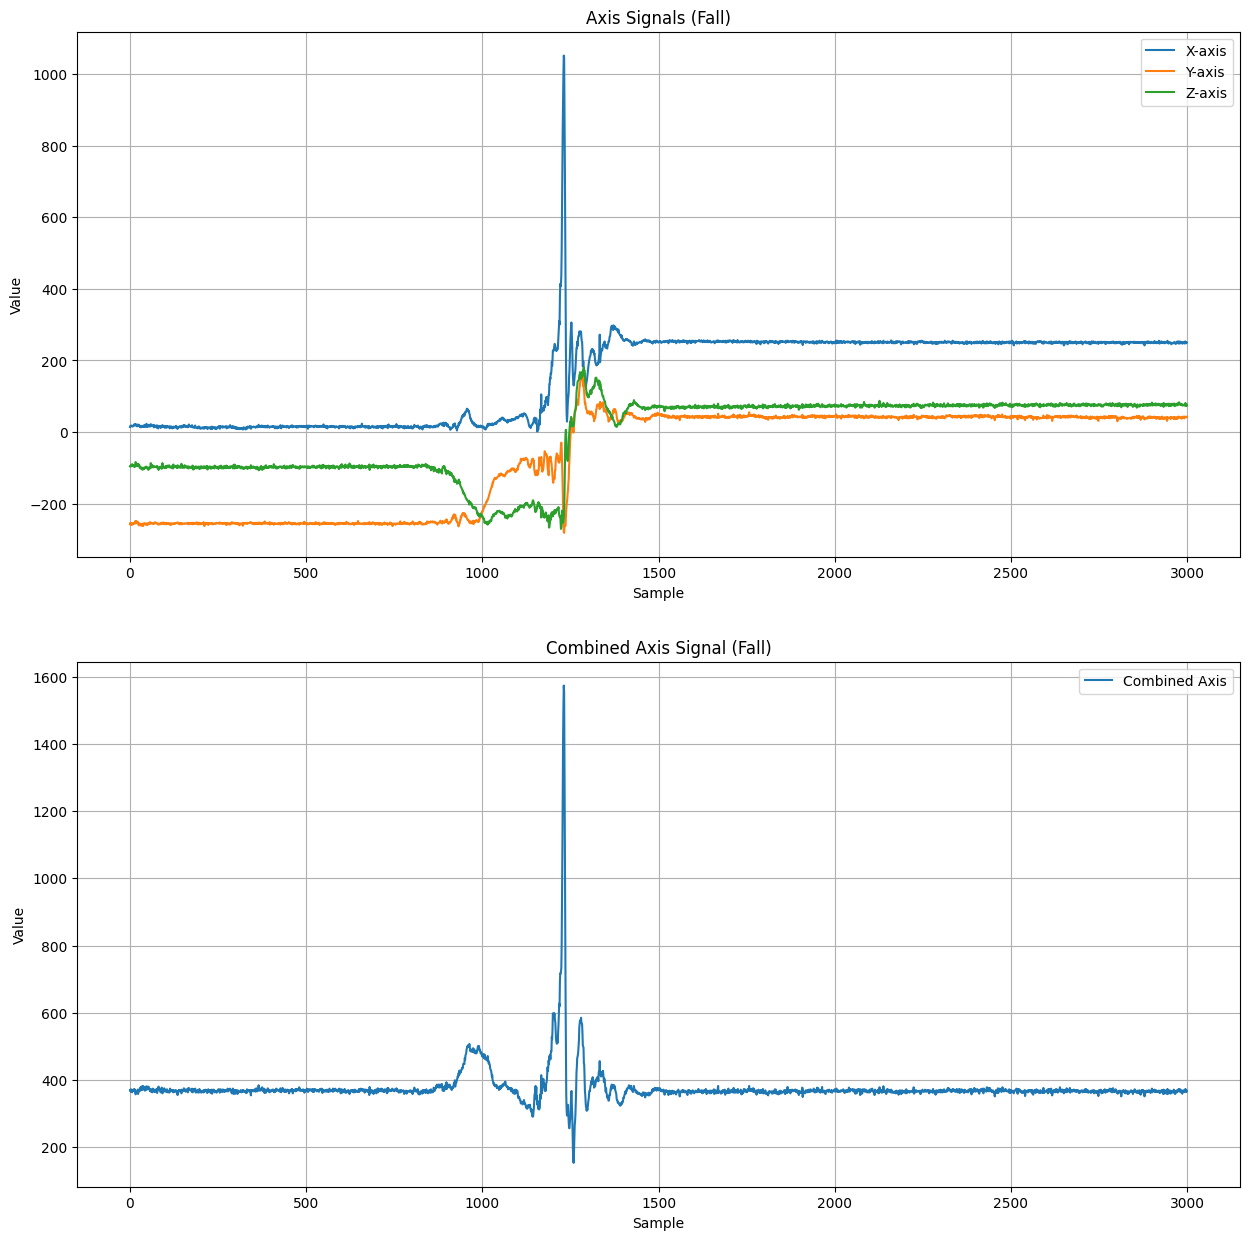

In [84]:
all_axis = np.abs(falls[0][0, :]) + np.abs(falls[0][1, :]) + np.abs(falls[0][2, :])
plt.figure(figsize=(15, 15))

plt.subplot(2, 1, 2)
plt.plot(all_axis, label='Combined Axis')
plt.title(f'Combined Axis Signal (Fall)')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.grid()
plt.legend()

plt.subplot(2, 1, 1)
plt.plot(falls[0][0, :], label='X-axis')
plt.plot(falls[0][1, :], label='Y-axis')
plt.plot(falls[0][2, :], label='Z-axis')
plt.title('Axis Signals (Fall)')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.grid()
plt.legend()

plt.show()

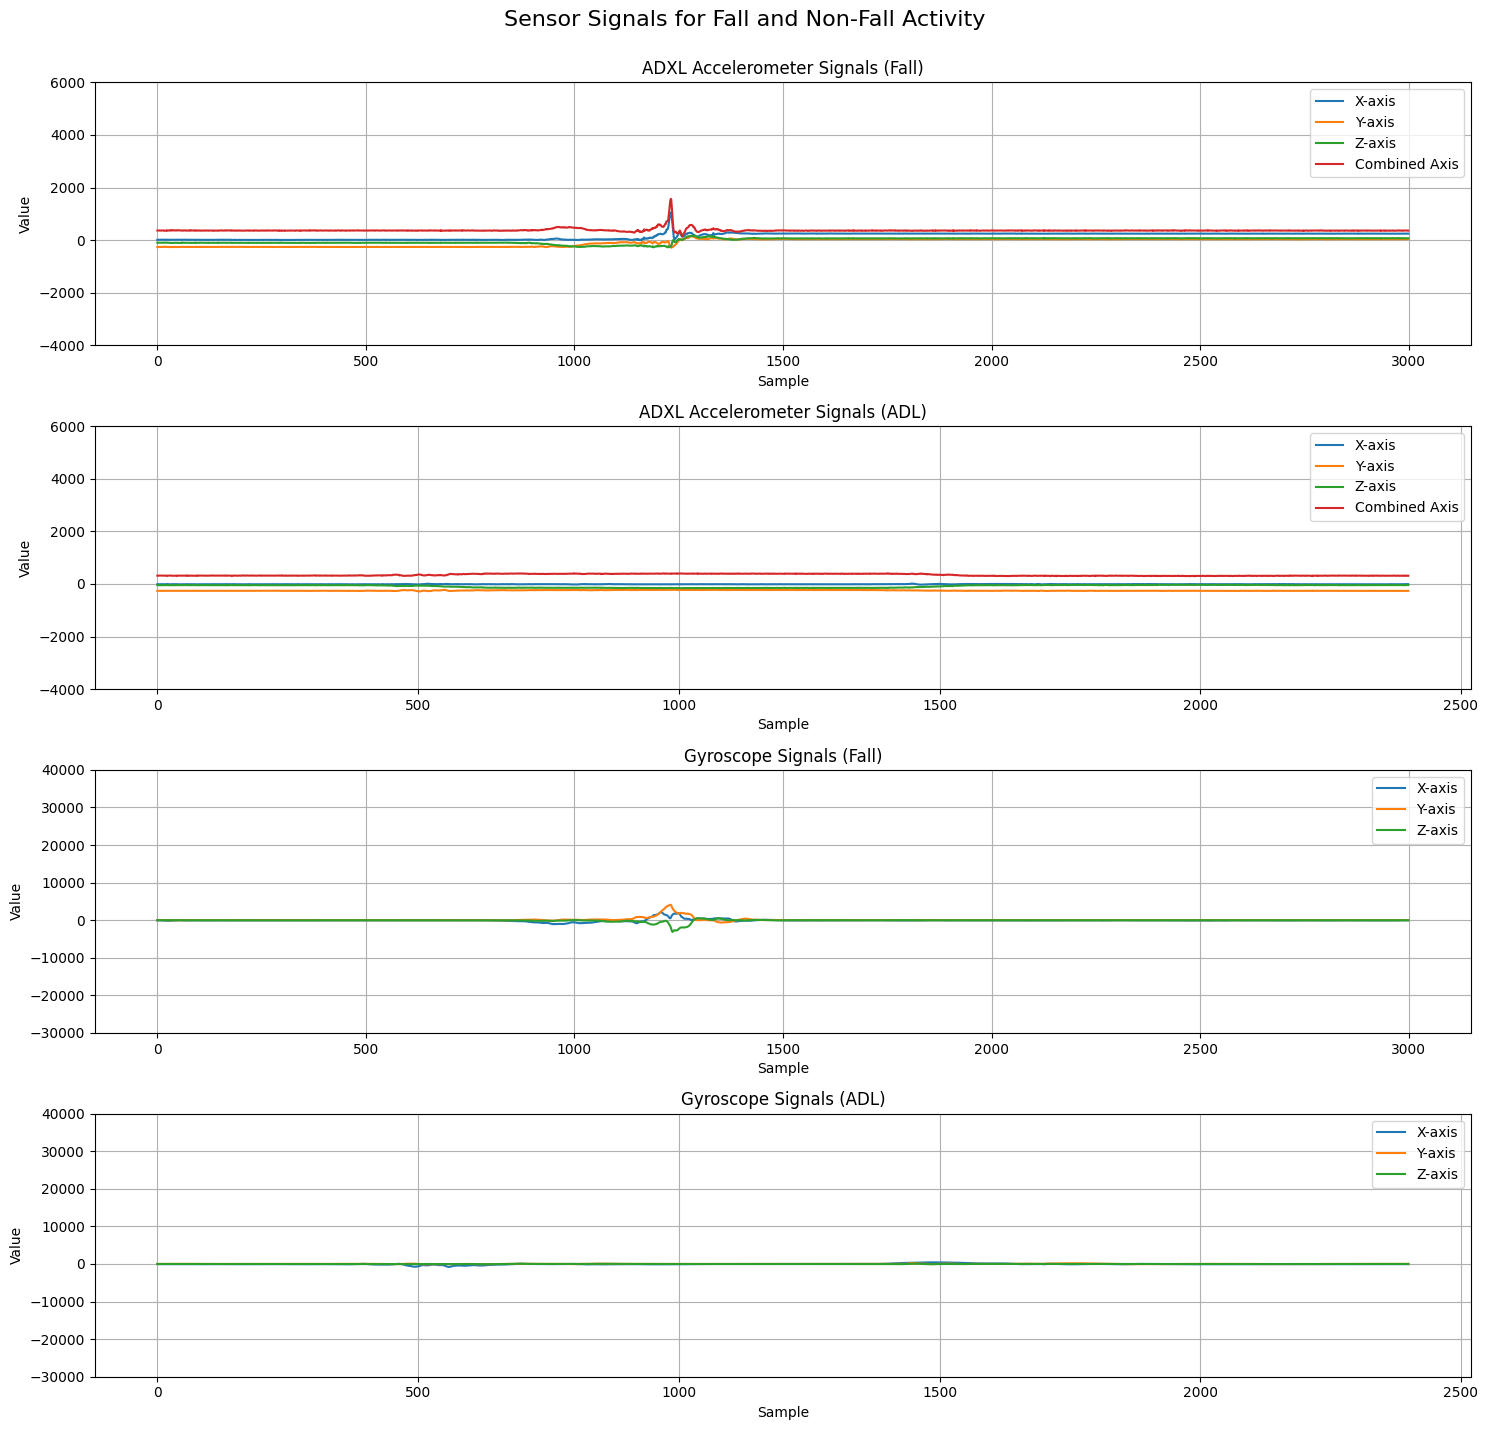

In [85]:
# compare plot of fall recording and adl recording

all_axis_fall = np.abs(falls[0][0, :]) + np.abs(falls[0][1, :]) + np.abs(falls[0][2, :])
all_axis_adl = np.abs(adls[0][0, :]) + np.abs(adls[0][1, :]) + np.abs(adls[0][2, :])

plt.figure(figsize=(15, 15))

# Plot the first 3 signals together
plt.subplot(4, 1, 1)
plt.plot(falls[0][0, :], label='X-axis')
plt.plot(falls[0][1, :], label='Y-axis')
plt.plot(falls[0][2, :], label='Z-axis')
plt.plot(all_axis_fall, label='Combined Axis', linestyle='-')
plt.title('ADXL Accelerometer Signals (Fall)')
plt.ylim(-4000, 6000)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.subplot(4, 1, 2)
plt.plot(adls[0][0, :], label='X-axis')
plt.plot(adls[0][1, :], label='Y-axis')
plt.plot(adls[0][2, :], label='Z-axis')
plt.plot(all_axis_adl, label='Combined Axis', linestyle='-')
plt.title('ADXL Accelerometer Signals (ADL)')
plt.ylim(-4000, 6000)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the last 3 signals and adding together
plt.subplot(4, 1, 3)
plt.plot(falls[0][3, :], label='X-axis')
plt.plot(falls[0][4, :], label='Y-axis')
plt.plot(falls[0][5, :], label='Z-axis')
plt.title('Gyroscope Signals (Fall)')
plt.ylim(-30000, 40000)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.subplot(4, 1, 4)
plt.plot(adls[0][3, :], label='X-axis')
plt.plot(adls[0][4, :], label='Y-axis')
plt.plot(adls[0][5, :], label='Z-axis')
plt.title('Gyroscope Signals (ADL)')
plt.ylim(-30000, 40000)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()


plt.suptitle('Sensor Signals for Fall and Non-Fall Activity', fontsize=16)
plt.tight_layout(rect = [0, 0.03, 1, 0.98])  # Adjust the title position
plt.show()

In [86]:
from scipy.signal import butter, filtfilt

In [87]:
# apply 4th order IIR butterworth filter

def butter_lowpass(cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Filter parameters
def lowpass_filter(data, cutoff, fs, order=4):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Define filter parameters
def plot_filtered_signals(original, filtered, title):
    plt.figure(figsize=(15, 5))
    plt.plot(original, label='Original Signal', alpha=0.5)
    plt.plot(filtered, label='Filtered Signal', color='red')
    plt.title(title)
    plt.xlabel('Sample')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
    plt.show()

In [88]:
all_data_filtered = []  # List to store filtered data
for i in range(len(all_data)):
    filtered_data = []
    for j in range(6):  # Assuming 6 signals (3 accelerometer + 3 gyroscope)
        filtered_signal = lowpass_filter(all_data[i][j, :], cutoff=5, fs=200, order=4)
        filtered_data.append(filtered_signal)
    all_data_filtered.append(np.array(filtered_data))

# for i in range(len(all_data)):
#     # Apply lowpass filter to each signal
#     for j in range(6):  # Assuming 6 signals (3 accelerometer + 3 gyroscope)
#         all_data[i][j, :] = lowpass_filter(all_data[i][j, :], cutoff=10, fs=100, order=4)



Number of filtered ADL signals: 2707
Number of filtered Fall signals: 1798


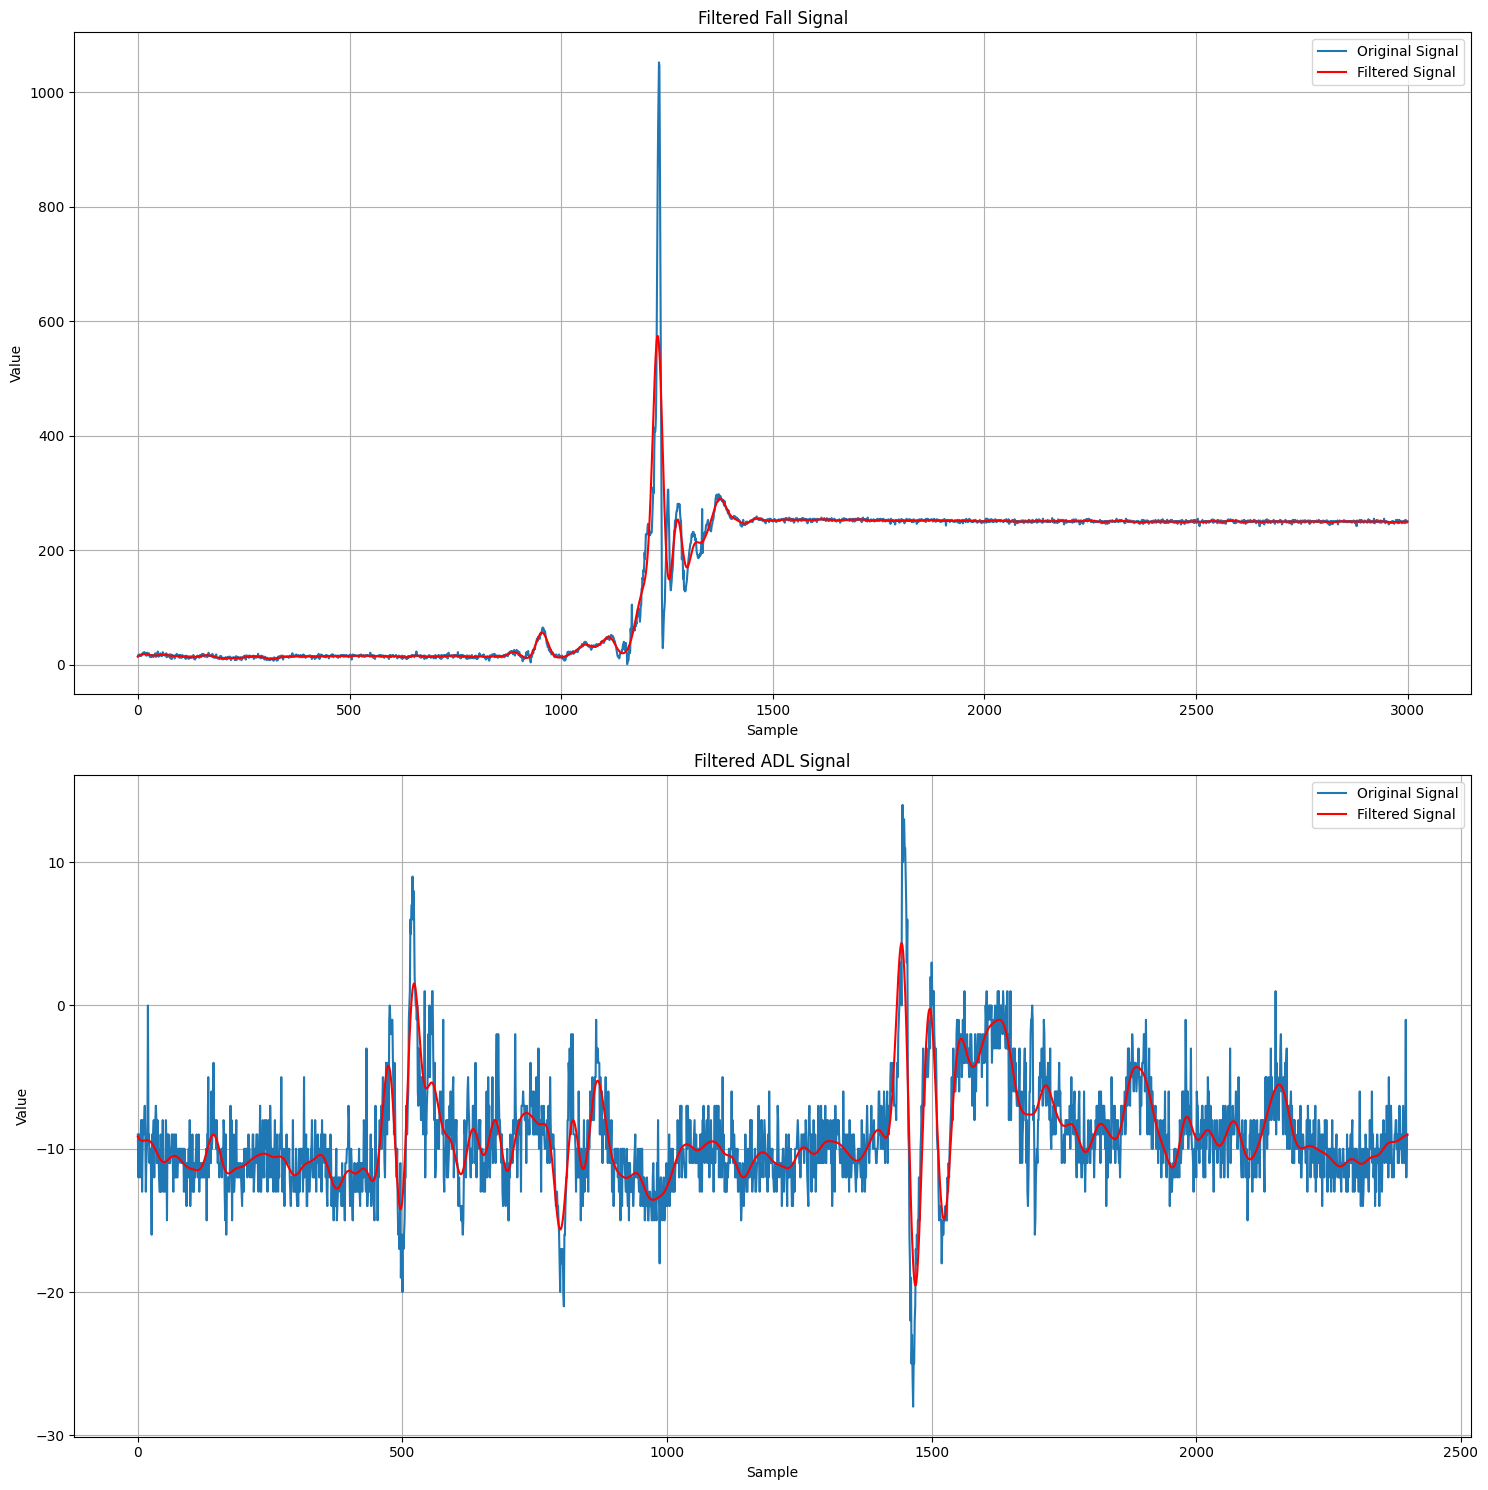

In [89]:
filtered_falls = []
filtered_adls = []
for i in range(len(all_labels)):
    if all_labels[i] == 'ADL':
        filtered_adls.append(all_data_filtered[i])
    elif all_labels[i] == 'Fall':
        filtered_falls.append(all_data_filtered[i])
print(f"Number of filtered ADL signals: {len(filtered_adls)}")
print(f"Number of filtered Fall signals: {len(filtered_falls)}")
# Plot the first filtered fall signal vs the original
plt.figure(figsize=(15, 15))
plt.subplot(2, 1, 1)
plt.plot(falls[0][0, :], label='Original Signal')
plt.plot(filtered_falls[0][0, :], label='Filtered Signal', color='red')
plt.title('Filtered Fall Signal')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(adls[0][0, :], label='Original Signal')
plt.plot(filtered_adls[0][0, :], label='Filtered Signal', color='red')
plt.title('Filtered ADL Signal')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# feature functions

In [90]:
# define function for feature extraction (Sum vector magnitude on horizontal plane)
def sum_vector_magnitude(signal_list, method='all'):
    """
    Compute sum vector magnitude feature from a list of sensor data arrays.

    Parameters:
        signal_list: list of np.ndarray, each of shape (6, n_samples)
                        Rows 0-2: Accelerometer [x, y, z]
        method: str, one of ['mean', 'max', 'all']
                - 'mean': return mean of value for the whole signal
                - 'max': return max of value
                - 'all': return list of values for every sample

    Returns:
        List of C2 feature values (one per signal input)
    """
    features = []

    for data in signal_list:
        acc_x = data[0, :]
        acc_z = data[2, :]

        values = np.sqrt(acc_x**2 + acc_z**2)

        if method == 'mean':
            features.append(np.mean(values))
        elif method == 'max':
            features.append(np.max(values))
        elif method == 'all':
            features.append(values)
        else:
            raise ValueError("Invalid method. Choose from 'mean', 'max', or 'all'.")
        
    print(f"Number of features extracted (f1): {len(features)}")
    return features


def max_peak_to_peak_amp(signal_list, window_size=50, step_size=25):
    """
    Compute max peak to peak amplitude feature from a list of sensor data arrays.
    
    Parameters:
        signal_list:    list of np.ndarray, each of shape (6, n_samples)
                        Rows 0-2: Accelerometer [x, y, z]
                        Rows 3-5: Gyroscope [x, y, z] (ignored)
        window_size: int, number of samples in each window
        step_size: int, sliding window step size

    Returns:
        List of feature values (one per signal input)
    """
    features = []

    for data in signal_list:
        # Compute acceleration magnitude: √(x² + y² + z²)
        acc_mag = np.linalg.norm(data[0:3, :], axis=0)

        segment_values = []

        # Slide over the signal with the given window size and step size
        for i in range(0, acc_mag.shape[0] - window_size + 1, step_size):
            segment = acc_mag[i:i + window_size]
            
            # Compute max and min for this segment
            max_val = np.max(segment)
            min_val = np.min(segment)
            
            # Calculate the RMS of the range (max - min)
            range_val = max_val - min_val
            rms_c3 = np.sqrt(np.mean(np.square(range_val)))  # RMS of a single value (range)
            
            segment_values.append(rms_c3)

        # Append the list of C3 values for this signal
        features.append(segment_values)

    print(f"Number of features extracted (f2): {len(features)}")
    return features


# define function for feature extraction Standard deviation magnitude on horizontal plane
def standard_deviation_magnitude_h(signal_list, window_size=50, step_size=25):
    """
    Compute Standard Deviation Magnitude feature from a list of 2D sensor data arrays.
    
    Parameters:
        signal_list: list of np.ndarray, each of shape (6, n_samples)
                        Rows 0-2: Accelerometer [x, y, z]
                        Rows 3-5: Gyroscope [x, y, z]
        window_size: int, size of the sliding window
        step_size: int, step size of the sliding window
    
    Returns:
        List of C8 values (one per input signal)
    """
    features = []

    for data in signal_list:
        acc_x = data[0, :]
        acc_z = data[2, :]

        values = []

        for i in range(0, acc_x.shape[0] - window_size + 1, step_size):
            segment_x = acc_x[i:i + window_size]
            segment_z = acc_z[i:i + window_size]

            std_x = np.std(segment_x)
            std_z = np.std(segment_z)

            value = np.sqrt(std_x**2 + std_z**2)
            values.append(value)
        
        features.append(values)
        # Optionally: use mean or max of all C8 values in the signal
        # features.append(np.mean(values))  # or np.max(values)

    print(f"Number of features extracted (f3): {len(features)}")
    return features


# define function for feature extraction Standard deviation magnitude
def standard_deviation_magnitude(signal_list, window_size=50, step_size=25):
    """
    Compute Standard Deviation Magnitude feature from a list of 6-row sensor data arrays.
    
    Parameters:
        signal_list: list of np.ndarray, each of shape (6, n_samples)
                        Rows 0-2: Accelerometer [x, y, z]
                        Rows 3-5: Gyroscope [x, y, z] (ignored)
        window_size: int, number of samples in each window
        step_size: int, sliding step size

    Returns:
        List of C9 values (one per signal input)
    """
    features = []

    for data in signal_list:
        acc_x = data[0, :]
        acc_y = data[1, :]
        acc_z = data[2, :]

        values = []

        for i in range(0, acc_x.shape[0] - window_size + 1, step_size):
            seg_x = acc_x[i:i + window_size]
            seg_y = acc_y[i:i + window_size]
            seg_z = acc_z[i:i + window_size]

            std_x = np.std(seg_x)
            std_y = np.std(seg_y)
            std_z = np.std(seg_z)

            value = np.sqrt(std_x**2 + std_y**2 + std_z**2)
            values.append(value)

        # Optionally summarize: mean or max or keep the full list
        # features.append(np.mean(values))  # or np.max(values)
        features.append(values)

    print(f"Number of features extracted (f4): {len(features)}")
    return features

# data_array = all_data
# f2 = max_peak_to_peak_amp(data_array)
# f3 = standard_deviation_magnitude_h(data_array)

In [91]:
data_array = all_data   

f1 = sum_vector_magnitude(data_array, method='all')
f2 = max_peak_to_peak_amp(data_array)
f3 = standard_deviation_magnitude_h(data_array)
f4 = standard_deviation_magnitude(data_array)


Number of features extracted (f1): 4505
Number of features extracted (f2): 4505
Number of features extracted (f3): 4505
Number of features extracted (f4): 4505


In [92]:
# check type and length of output data

print(type(f1), len(f1), len(f1[4]))  # Use len(f1) since f1 is a list of arrays
print(type(f2), len(f2), len(f2[0]))  # Use np.shape(f2) since f2 is a list of arrays
print(type(f3), len(f3), len(f3[0]))  # Use np.shape(f3) since f3 is a list of arrays
print(type(f4), len(f4), len(f4[0]))  # Use np.shape(f4) since f4 is a list of arrays


<class 'list'> 4505 20000
<class 'list'> 4505 95
<class 'list'> 4505 95
<class 'list'> 4505 95


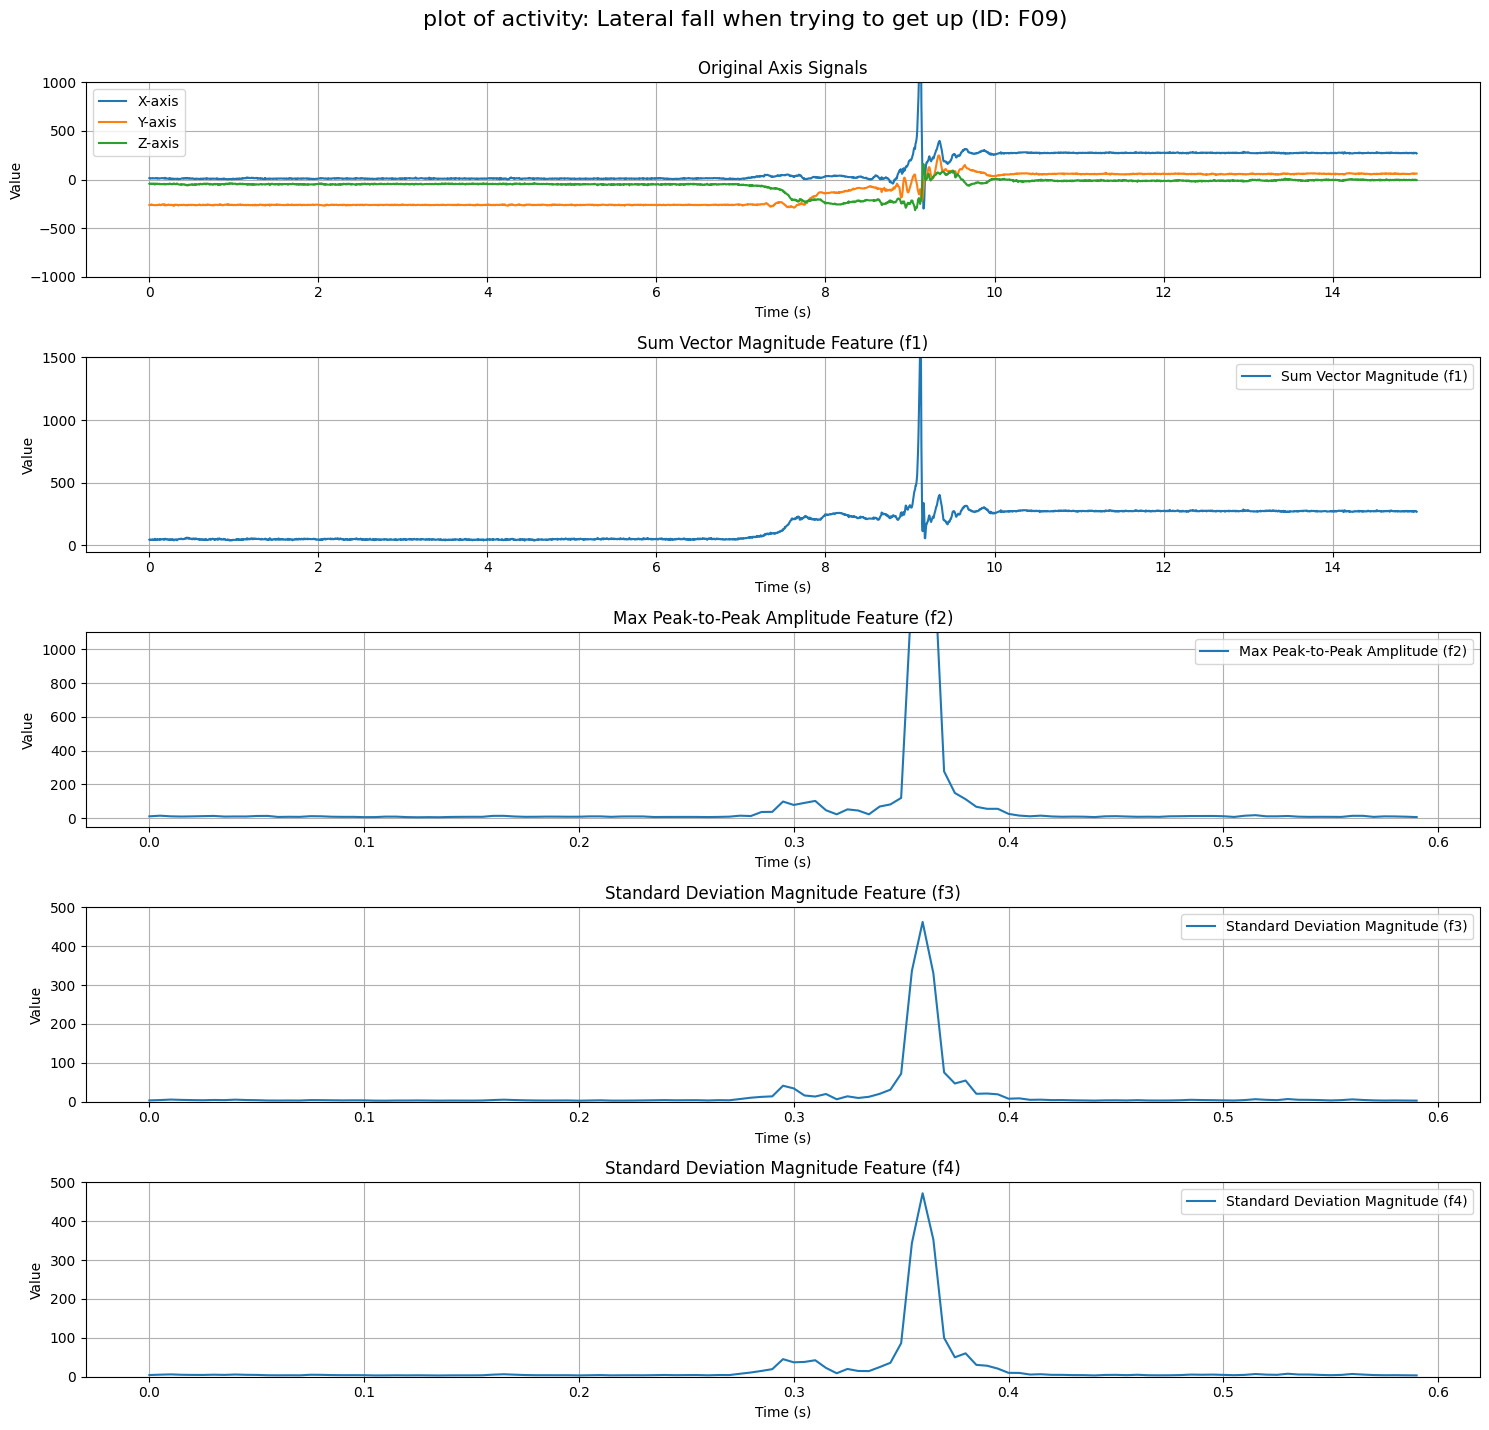

In [93]:
sample_num = 10

plt.figure(figsize=(15, 15))
time = np.arange(0, len(all_data[sample_num][0, :])) / 200  # Assuming a sampling rate of 200 Hz
# Plot the Original Signal
plt.subplot(5, 1, 1)
plt.plot(time, all_data[sample_num][0, :], label='X-axis')
plt.plot(time, all_data[sample_num][1, :], label='Y-axis')
plt.plot(time, all_data[sample_num][2, :], label='Z-axis')
plt.ylim(-1000, 1000)
plt.title(f'Original Axis Signals')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Sum Vector Magnitude (f1)
plt.subplot(5, 1, 2)
plt.plot(time[:len(f1[sample_num])], f1[sample_num], label='Sum Vector Magnitude (f1)')
plt.ylim(-50, 1500)
plt.title(f'Sum Vector Magnitude Feature (f1)')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Max Peak-to-Peak Amplitude (f2)
plt.subplot(5, 1, 3)
plt.plot(time[:len(f2[sample_num])], f2[sample_num], label='Max Peak-to-Peak Amplitude (f2)')
plt.ylim(-50, 1100)
plt.title(f'Max Peak-to-Peak Amplitude Feature (f2)')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Standard Deviation Magnitude on Horizontal Plane (f3)
plt.subplot(5, 1, 4)
plt.plot(time[:len(f3[sample_num])], f3[sample_num], label='Standard Deviation Magnitude (f3)')
plt.ylim(0, 500)
plt.title(f'Standard Deviation Magnitude Feature (f3)')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Standard Deviation Magnitude (f4)
plt.subplot(5, 1, 5)
plt.plot(time[:len(f4[sample_num])], f4[sample_num], label='Standard Deviation Magnitude (f4)')
plt.ylim(0, 500)
plt.title(f'Standard Deviation Magnitude Feature (f4)')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.suptitle(
    f"plot of activity: {activity_mapping[activity_code_list[sample_num]]} "
    f"(ID: {activity_code_list[sample_num]})", fontsize=16
)
plt.tight_layout(rect = [0, 0.03, 1, 0.98])
plt.show()



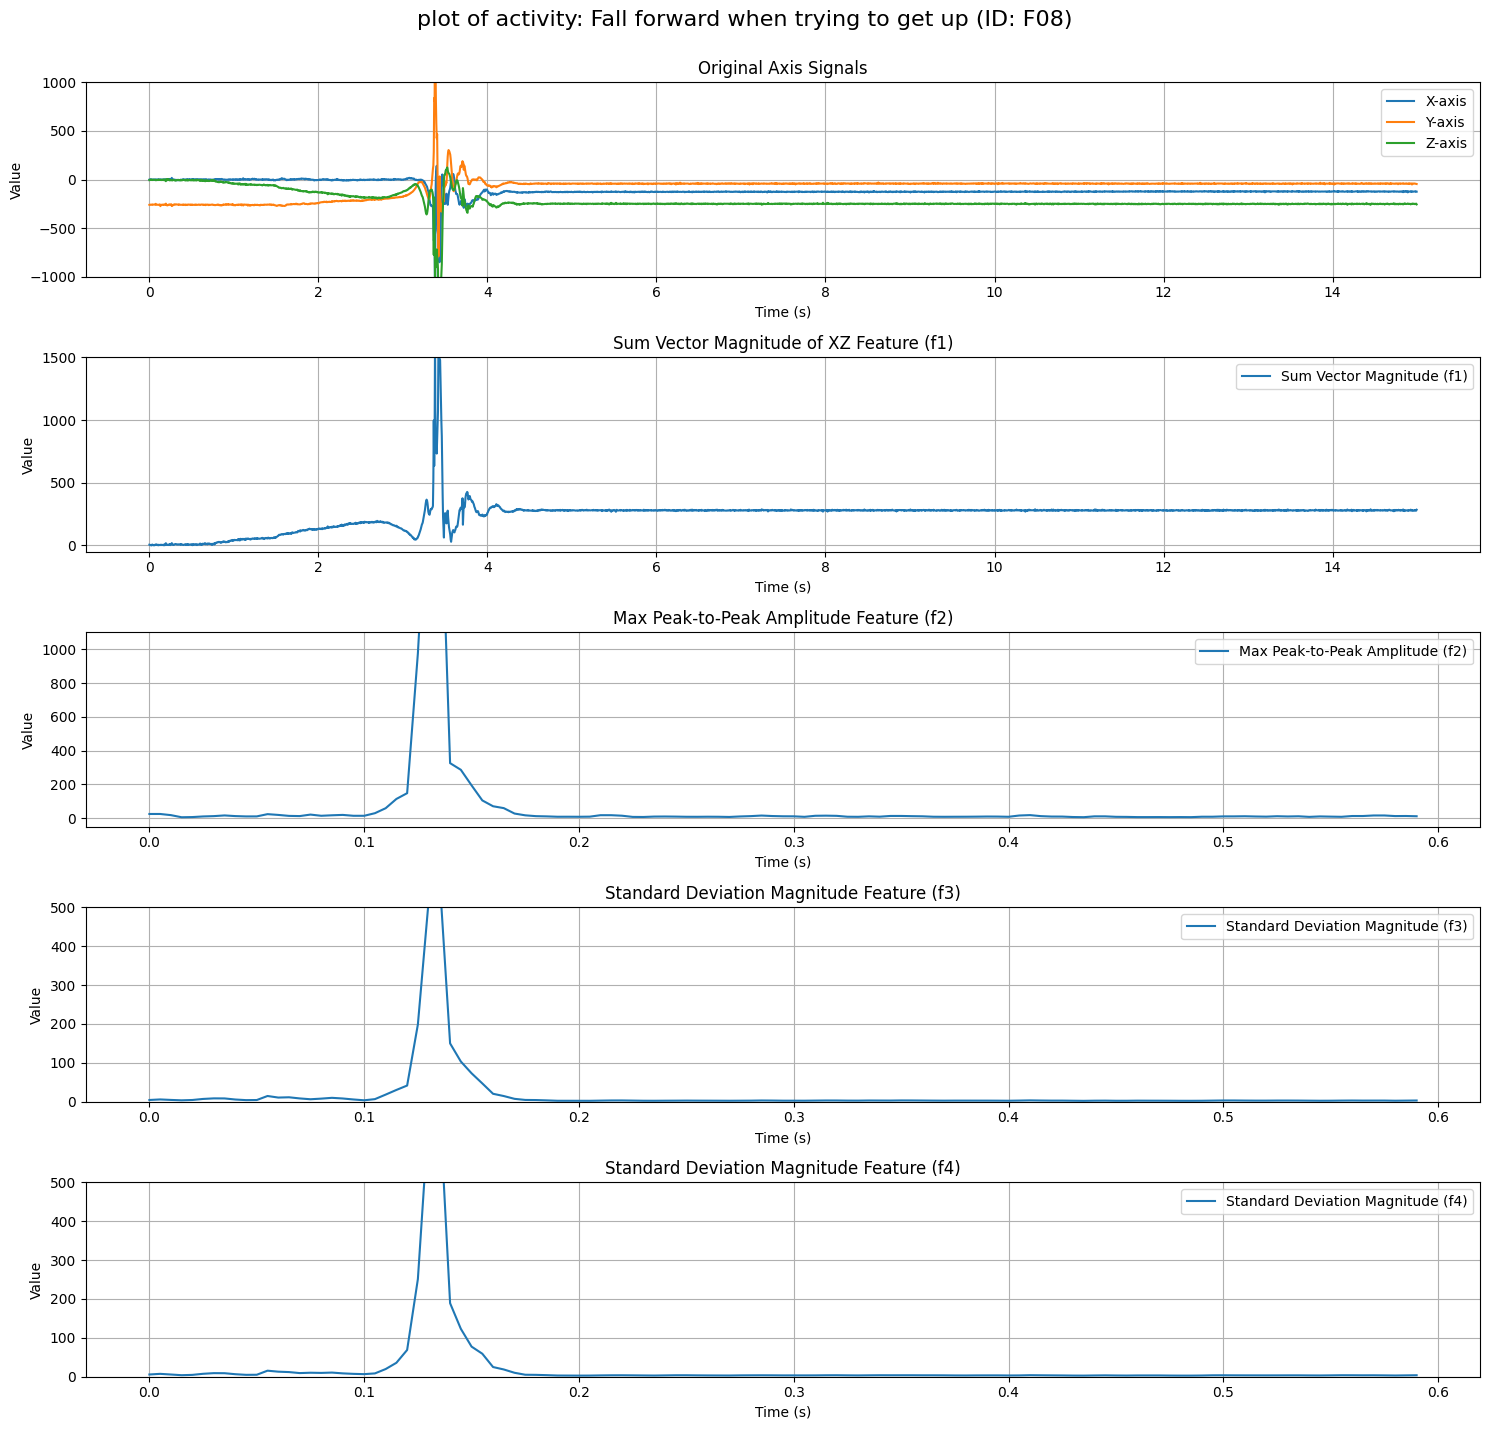

In [94]:
sample_num = 1000

plt.figure(figsize=(15, 15))
time = np.arange(0, len(all_data[sample_num][0, :])) / 200  # Assuming a sampling rate of 200 Hz
# Plot the Original Signal
plt.subplot(5, 1, 1)
plt.plot(time, all_data[sample_num][0, :], label='X-axis')
plt.plot(time, all_data[sample_num][1, :], label='Y-axis')
plt.plot(time, all_data[sample_num][2, :], label='Z-axis')
plt.ylim(-1000, 1000)
plt.title(f'Original Axis Signals')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Sum Vector Magnitude (f1)
plt.subplot(5, 1, 2)
plt.plot(time[:len(f1[sample_num])], f1[sample_num], label='Sum Vector Magnitude (f1)')
plt.ylim(-50, 1500)
plt.title(f'Sum Vector Magnitude of XZ Feature (f1)')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Max Peak-to-Peak Amplitude (f2)
plt.subplot(5, 1, 3)
plt.plot(time[:len(f2[sample_num])], f2[sample_num], label='Max Peak-to-Peak Amplitude (f2)')
plt.ylim(-50, 1100)
plt.title(f'Max Peak-to-Peak Amplitude Feature (f2)')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Standard Deviation Magnitude on Horizontal Plane (f3)
plt.subplot(5, 1, 4)
plt.plot(time[:len(f3[sample_num])], f3[sample_num], label='Standard Deviation Magnitude (f3)')
plt.ylim(0, 500)
plt.title(f'Standard Deviation Magnitude Feature (f3)')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Standard Deviation Magnitude (f4)
plt.subplot(5, 1, 5)
plt.plot(time[:len(f4[sample_num])], f4[sample_num], label='Standard Deviation Magnitude (f4)')
plt.ylim(0, 500)
plt.title(f'Standard Deviation Magnitude Feature (f4)')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.suptitle(
    f"plot of activity: {activity_mapping[activity_code_list[sample_num]]} "
    f"(ID: {activity_code_list[sample_num]})", fontsize=16
)
plt.tight_layout(rect = [0, 0.03, 1, 0.98])
plt.show()

In [95]:
# crate window for visualizing time of fall

# if value of x, y and z axis is less than 0.5 then window starts
def find_fall_window(signal, threshold=600):
    """
    Find the start and end indices of the fall window in a signal.
    
    Parameters:
        signal: np.ndarray, the signal data
        threshold: float, threshold for detecting fall
    
    Returns:
        start: int, start index of the fall window
        end: int, end index of the fall window
    """
    # Find where all three axes are below the threshold
    # mask = (np.abs(signal[0]) < threshold) & (np.abs(signal[1]) < threshold) & (np.abs(signal[2]) < threshold)
    # mask_value = (np.abs(signal[0]) + np.abs(signal[1]) + np.abs(signal[2]))
    mask = (np.abs(signal[0]) + np.abs(signal[2])) > threshold

    # Find the start and end indices of the fall window
    start = np.where(mask)[0][0] if np.any(mask) else None
    # end = np.where(mask)[0][-1] if np.any(mask) else None
    end = start + 100 if start is not None else None  # Assuming a fixed window size of 2000 samples
    # print(mask_value)
    return start, end

def plot_fall_window(signal, start, end):
    """
    Plot a window of the fall signal.
    
    Parameters:
        signal: np.ndarray, the signal data
        start: int, start index of the window
        end: int, end index of the window
    """
    plt.figure(figsize=(10, 5))
    if start is not None and end is not None:
        time = np.arange(start, end) / 200  # Assuming a sampling rate of 200 Hz
        plt.plot(time, signal[0, start:end], label='Fall Signal')  # Use the first axis of the signal for plotting
    else:
        print("Invalid start or end indices. Cannot plot the fall window.")
    plt.title('Window of Fall Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
    plt.show()
    

In [96]:
sample_number = 1000  # Index of the sample you want to analyze
signal = all_data[sample_number][0:3,:]  # Example signal
print(signal.shape)

(3, 3000)


Start index of fall window: 672
End index of fall window: 772


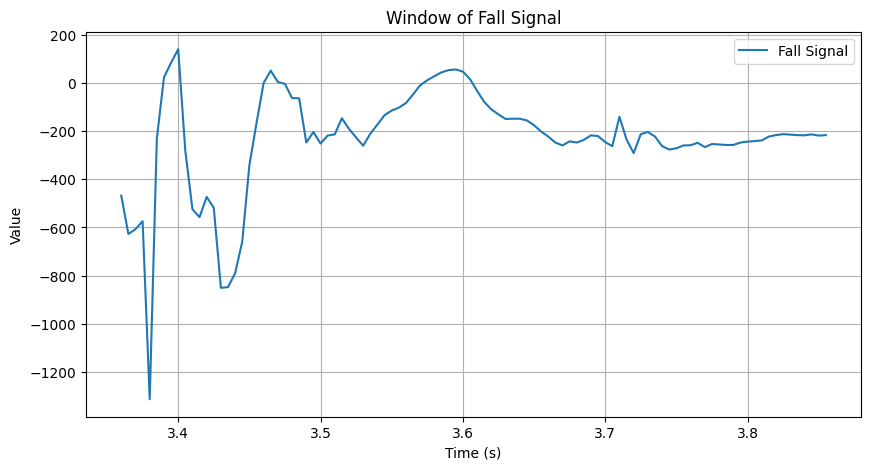

In [97]:
start, end = find_fall_window(signal)
print(f"Start index of fall window: {start}")
print(f"End index of fall window: {end}")
plot_fall_window(signal, start, end)

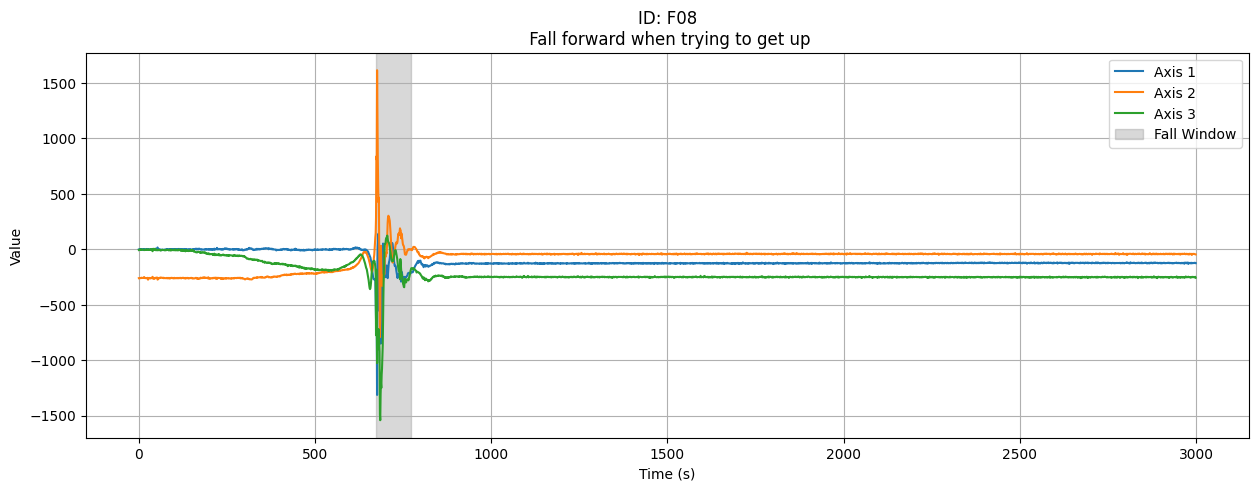

In [98]:
# plot the fall window with the signal
time = np.arange(0, len(signal)) / 200  # Assuming a sampling rate of 200 Hz

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.plot( signal[i,:], label=f'Axis {i+1}')
plt.axvspan(start, end, color='gray', alpha=0.3, label='Fall Window')
plt.title(
    f"ID: {activity_code_list[sample_number]}\n "
    f"{activity_mapping[activity_code_list[sample_number]]}")
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [99]:
# calculate and plot the fall window for n samples
sample_numbers = np.random.randint(1, 4505, size=10)
print(sample_numbers)

[ 214 2869  850 2612 4386  233  909  444  846  737]


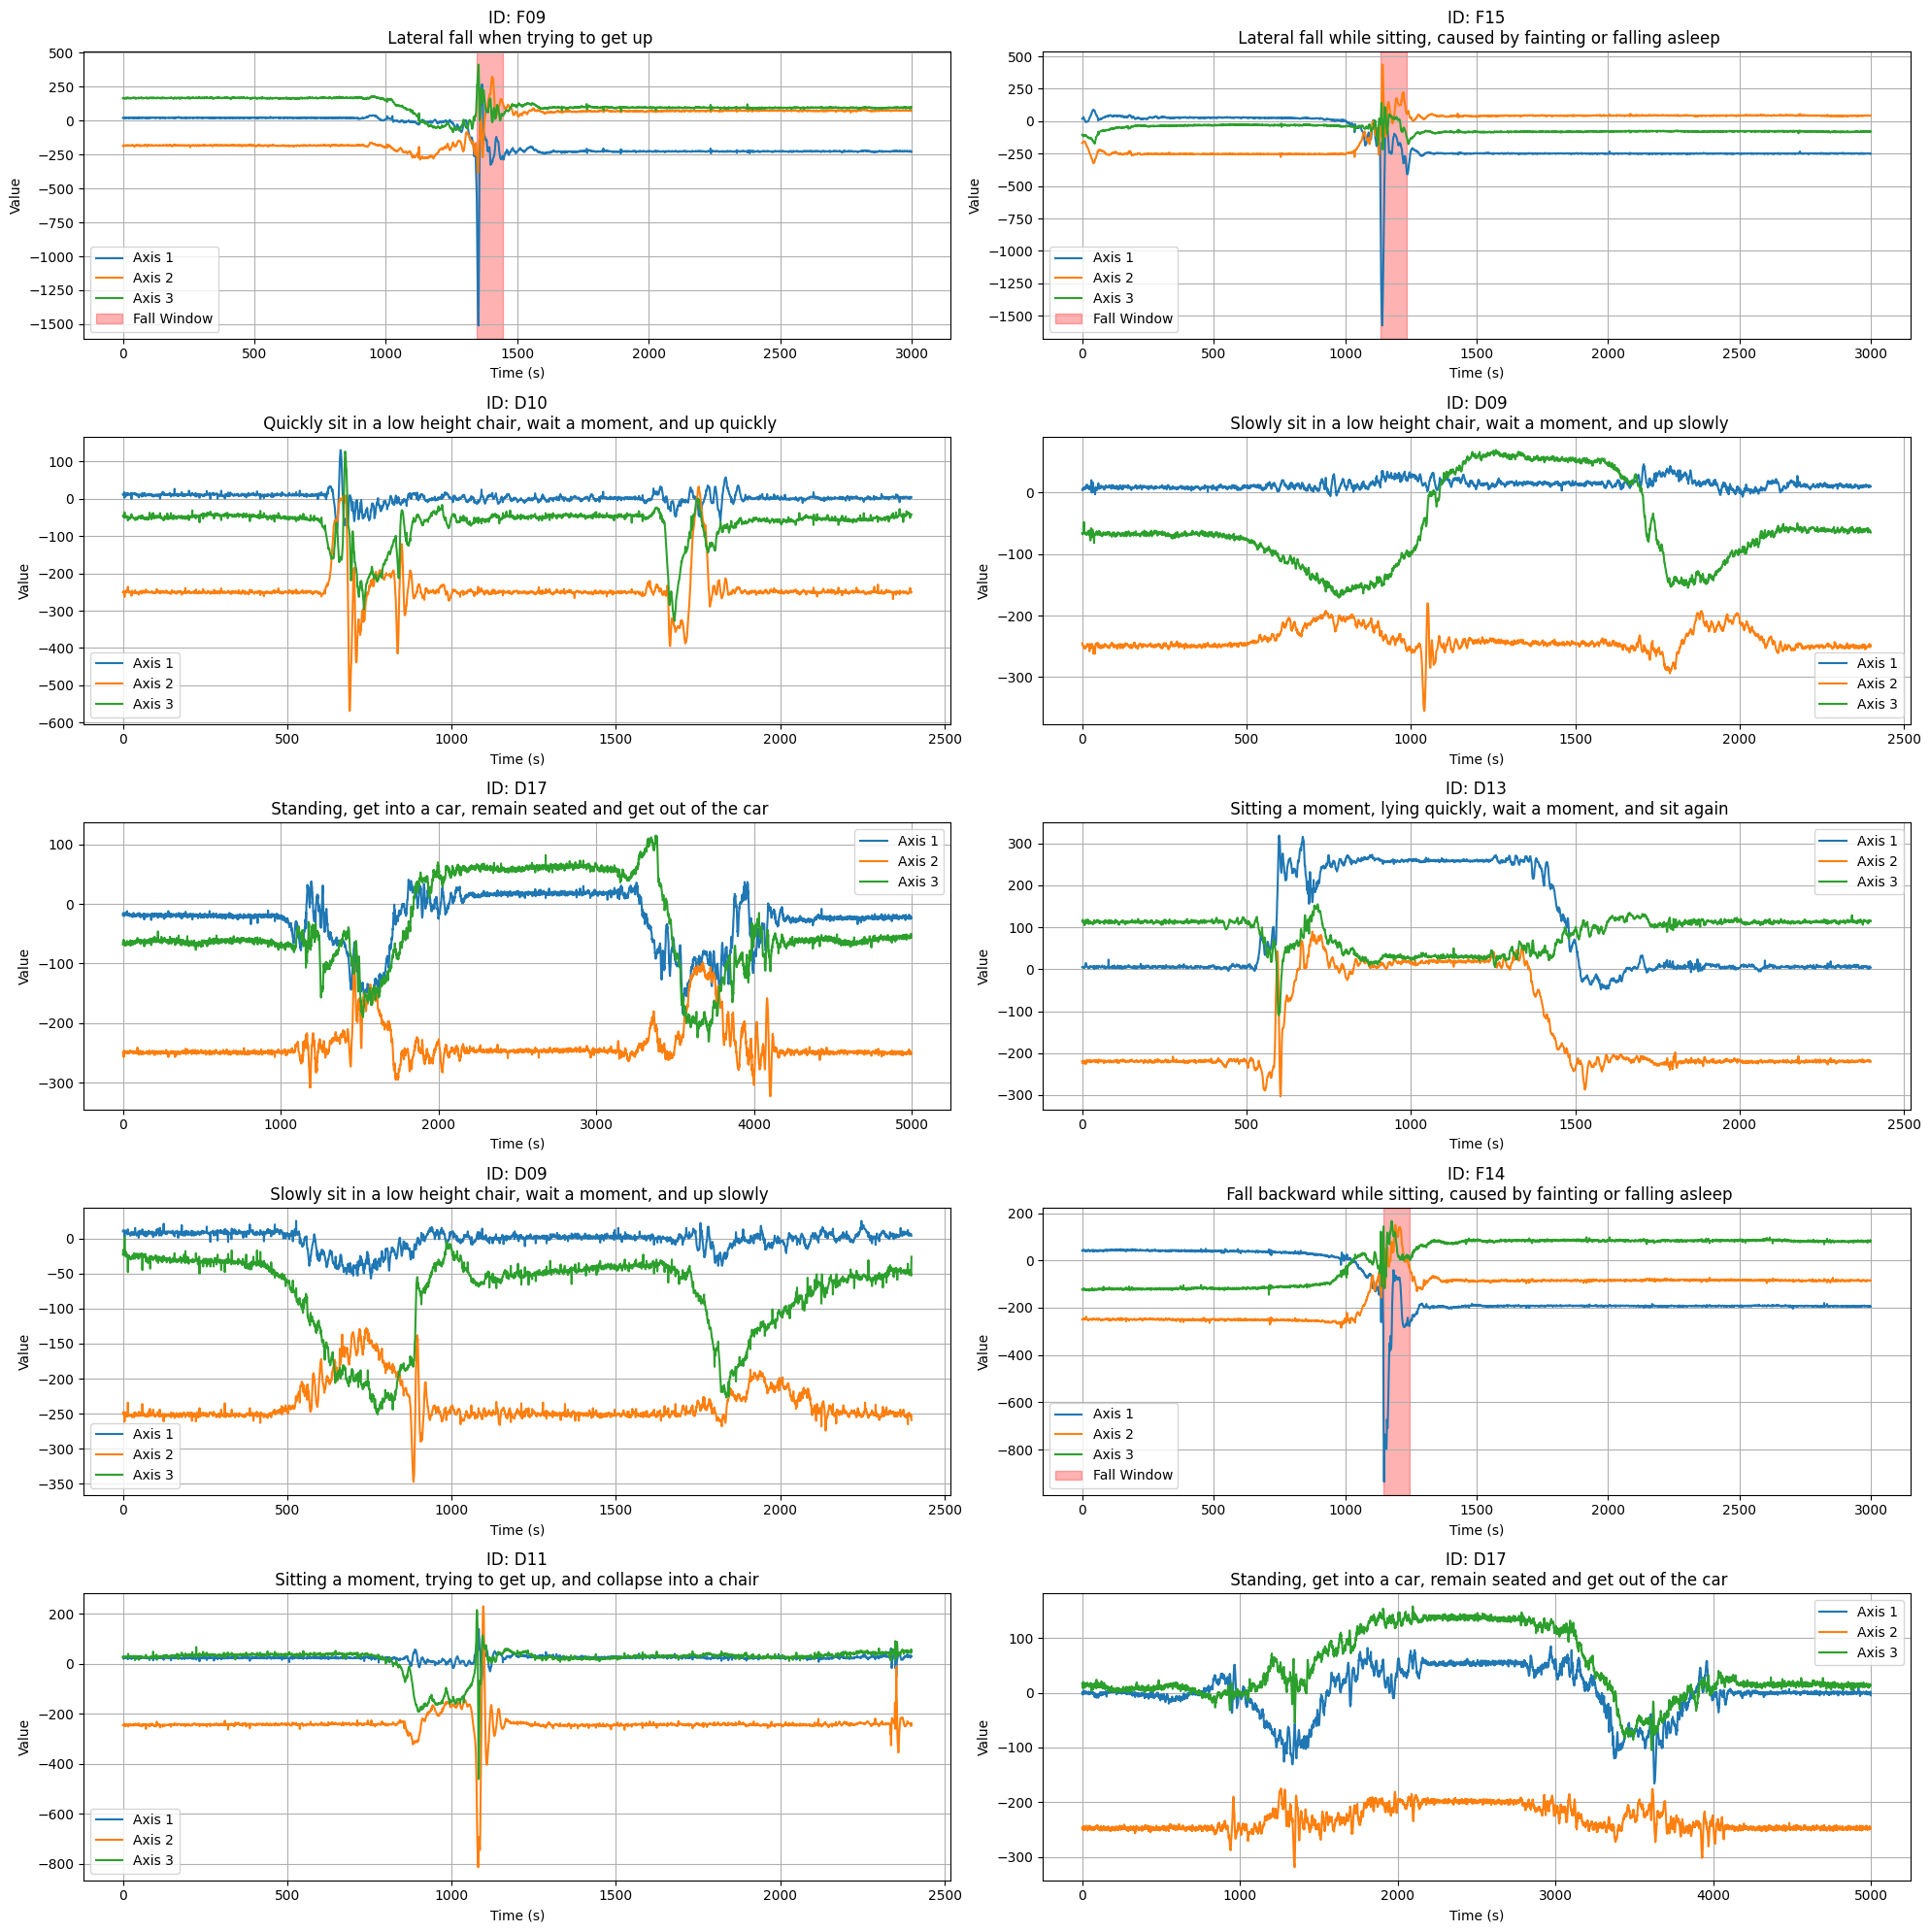

In [100]:

plt.figure(figsize=(20, 20))
for i, sample_number in enumerate(sample_numbers):
    signal = all_data[sample_number][0:3, :]  # Example signal
    start, end = find_fall_window(signal, threshold=650)
    
    plt.subplot(5, 2, i + 1)
    for j in range(3):
        plt.plot(signal[j, :], label=f'Axis {j+1}')
    if start is not None and end is not None:
        plt.axvspan(start, end, color='red', alpha=0.3, label='Fall Window')
    plt.title(
        f"ID: {activity_code_list[sample_number]}\n "
        f"{activity_mapping[activity_code_list[sample_number]]}")
    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
plt.tight_layout()
plt.show()

## find maximum number of each fall

in order to set threshold, we should find minimum "max number" in fall signals. 

In [101]:
fall_f1 = sum_vector_magnitude(falls, method='all')

Number of features extracted (f1): 1798


In [102]:
list_of_maxs = []
list_of_xyz_maxs = []
list_of_xz_maxs = []
f1_max_list = []

for fall in falls:
    list_of_maxs.append(np.max(fall[0:3, :], axis=1))
    list_of_xz_maxs.append(np.max(np.abs(fall[0, :]) + np.abs(fall[2, :])))
    list_of_xyz_maxs.append(np.max(np.abs(fall[0, :]) + np.abs(fall[1, :]) + np.abs(fall[2, :])))
    f1_max_list.append(np.max(fall_f1[i]))


In [103]:
len(list_of_maxs), len(list_of_xz_maxs), len(list_of_xyz_maxs), len(f1_max_list)

(1798, 1798, 1798, 1798)

In [104]:
np.shape(list_of_maxs), len(list_of_maxs), len(list_of_xz_maxs), len(list_of_xyz_maxs),

((1798, 3), 1798, 1798, 1798)

In [105]:
# print minimum number in f1_max_list
min_value_f1 = np.min(f1_max_list)
min_index_f1 = f1_max_list.index(min_value_f1)
print(f"Minimum value in f1_max_list: {min_value_f1} at index {min_index_f1}")

min_value_xz = np.min(list_of_xz_maxs)
min_index_xz = list_of_xz_maxs.index(min_value_xz)
print(f"Minimum value in list_of_xz_maxs: {min_value_xz} at index {min_index_xz}")

min_value_xyz = np.min(list_of_xyz_maxs)
min_index_xyz = list_of_xyz_maxs.index(min_value_xyz)
print(f"Minimum value in list_of_xyz_maxs: {min_value_xyz} at index {min_index_xyz}")


Minimum value in f1_max_list: 1163.9931271274759 at index 0
Minimum value in list_of_xz_maxs: 343 at index 1779
Minimum value in list_of_xyz_maxs: 618 at index 662


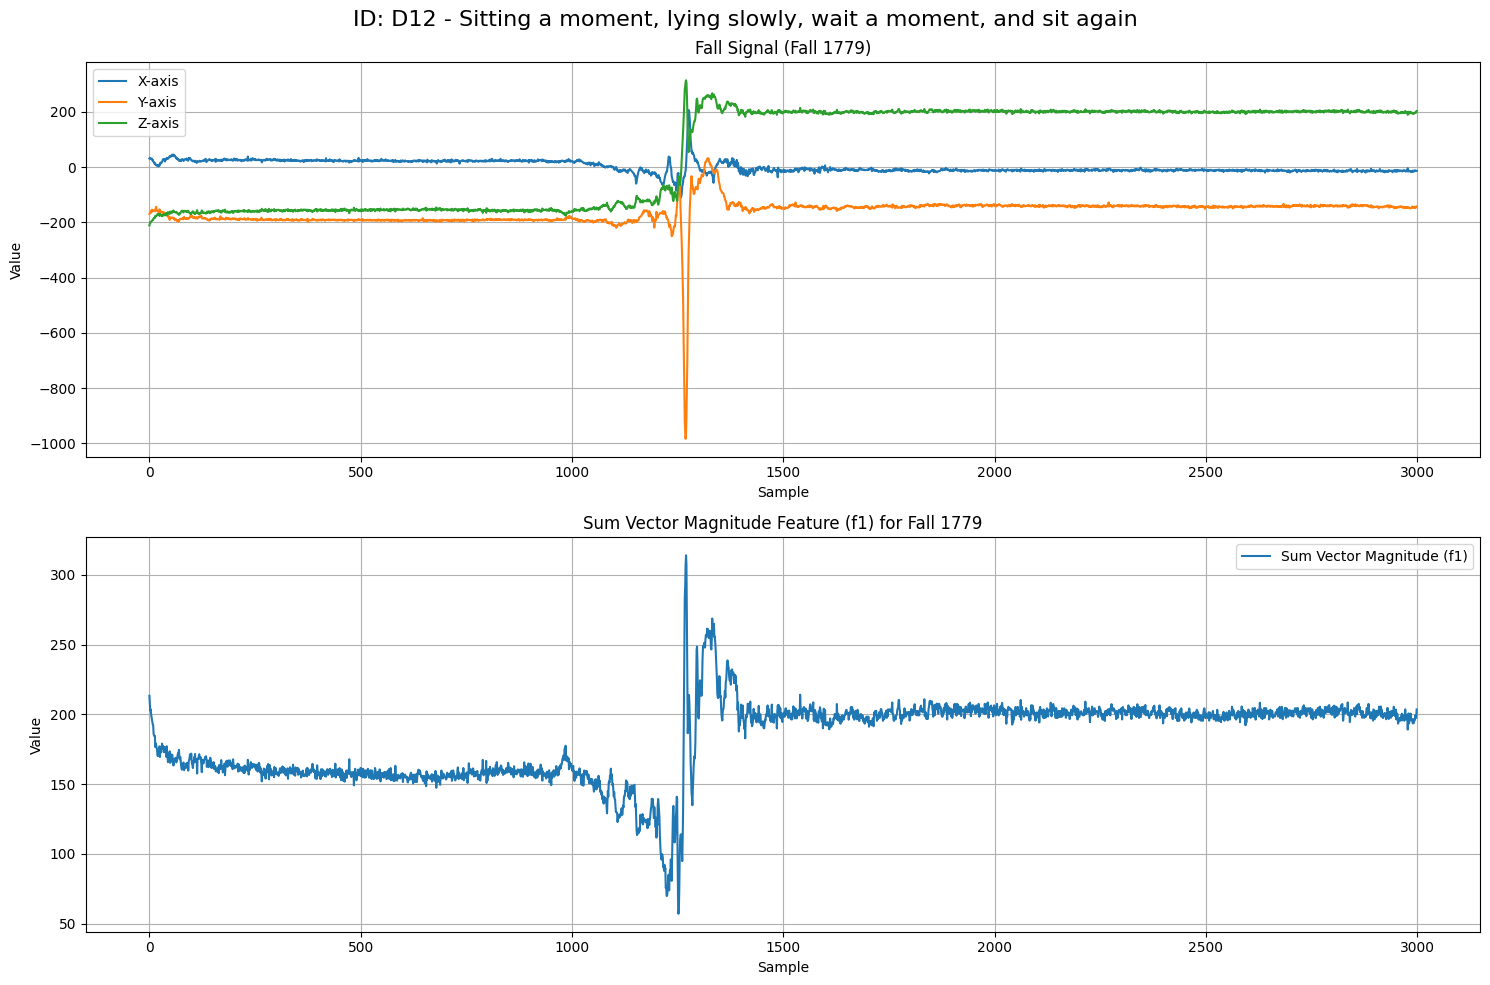

In [106]:
#plot fall[33]

kk = min_index_xz

plt.figure(figsize=(15, 10))

# Plot the original signal
plt.subplot(2, 1, 1)
plt.plot(falls[kk][0, :], label='X-axis')
plt.plot(falls[kk][1, :], label='Y-axis')
plt.plot(falls[kk][2, :], label='Z-axis')
plt.title(f'Fall Signal (Fall {kk})')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the sum vector magnitude (f1)
plt.subplot(2, 1, 2)
plt.plot(fall_f1[kk], label='Sum Vector Magnitude (f1)')
plt.title(f'Sum Vector Magnitude Feature (f1) for Fall {kk}')

plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.suptitle(
    f"ID: {activity_code_list[kk]} - "
    f"{activity_mapping[activity_code_list[kk]]}", fontsize=16)
plt.tight_layout()
plt.show()

### make all data same shape by trimming longer signals to size of minimum signal

In [107]:
min_length = min(matrix.shape[1] for matrix in all_data)
print(f"Minimum length of all data matrices: {min_length}")

Minimum length of all data matrices: 1999


In [108]:

# Make all data the same length by keeping the middle part
# Return a new list with all signals trimmed to the same length (centered)

def data_equal_trim(signals):
    min_length = min(matrix.shape[1] for matrix in signals)
    trimmed_signals = []

    for i in range(len(signals)):
        d_length = signals[i].shape[1]
        if d_length > min_length:
            diff = d_length - min_length
            start = diff // 2
            trimmed = signals[i][:, start:start + min_length]
        else:
            trimmed = signals[i].copy()  # keep original if already min length

        trimmed_signals.append(trimmed)
    
    return trimmed_signals

# new_data = data_length_equal(all_data)

In [109]:
trimmed_data = data_equal_trim(all_data) 

In [110]:
shapes = [data.shape for data in trimmed_data]
print(f"Number of samples: {len(trimmed_data)}")
print(f"Shape of each sample: {shapes[:5]} ...")  # Display the shape of the first 5 samples

Number of samples: 4505
Shape of each sample: [(6, 1999), (6, 1999), (6, 1999), (6, 1999), (6, 1999)] ...


In [111]:
trimmed_data = np.array(trimmed_data)
print(f"Shape of the new data: {trimmed_data.shape}")  # Shape should be (number_of_samples, 6, min_length)

Shape of the new data: (4505, 6, 1999)


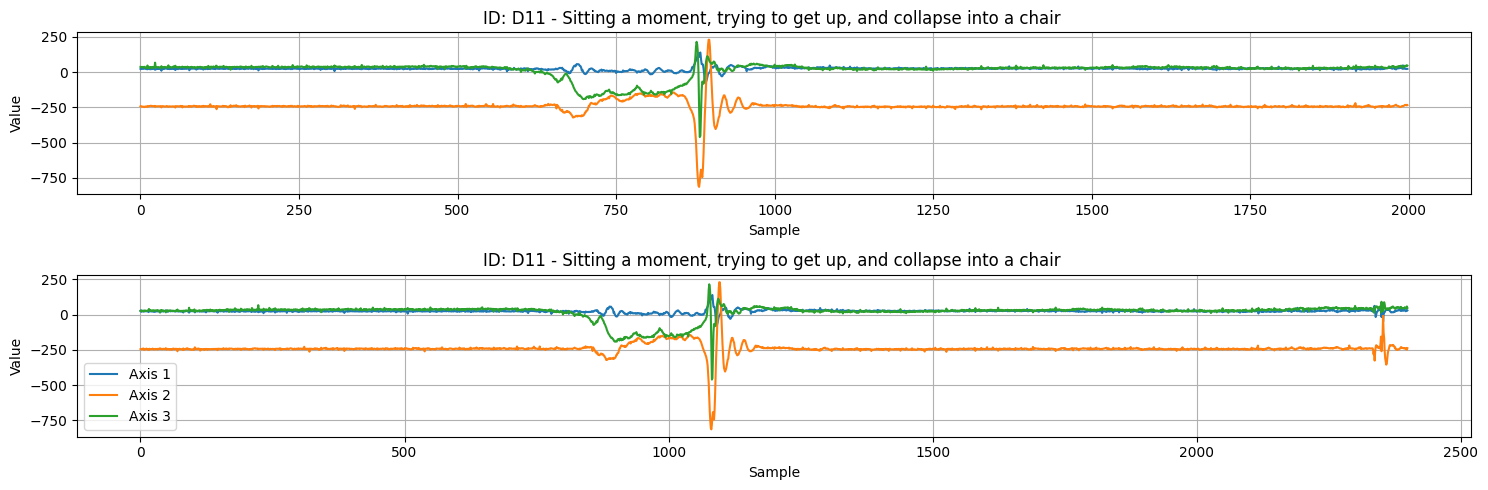

In [112]:
plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
for i in range(3):
    plt.plot(trimmed_data[sample_numbers[8]][i, :], label=f'Axis {i+1}')
plt.title(
    f"ID: {activity_code_list[sample_numbers[8]]} - "
    f"{activity_mapping[activity_code_list[sample_numbers[8]]]}")
plt.xlabel('Sample')
plt.ylabel('Value')
plt.grid()


plt.subplot(2, 1, 2)
for i in range(3):
    plt.plot(all_data[sample_numbers[8]][i, :], label=f'Axis {i+1}')
plt.title(
    f"ID: {activity_code_list[sample_numbers[8]]} - "
    f"{activity_mapping[activity_code_list[sample_numbers[8]]]}")
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

In [113]:


f1_trimmed_data = sum_vector_magnitude(trimmed_data, method='all')
f2_trimmed_data = max_peak_to_peak_amp(trimmed_data)
f3_trimmed_data = standard_deviation_magnitude_h(trimmed_data)
f4_trimmed_data = standard_deviation_magnitude(trimmed_data)

Number of features extracted (f1): 4505
Number of features extracted (f2): 4505
Number of features extracted (f3): 4505
Number of features extracted (f4): 4505


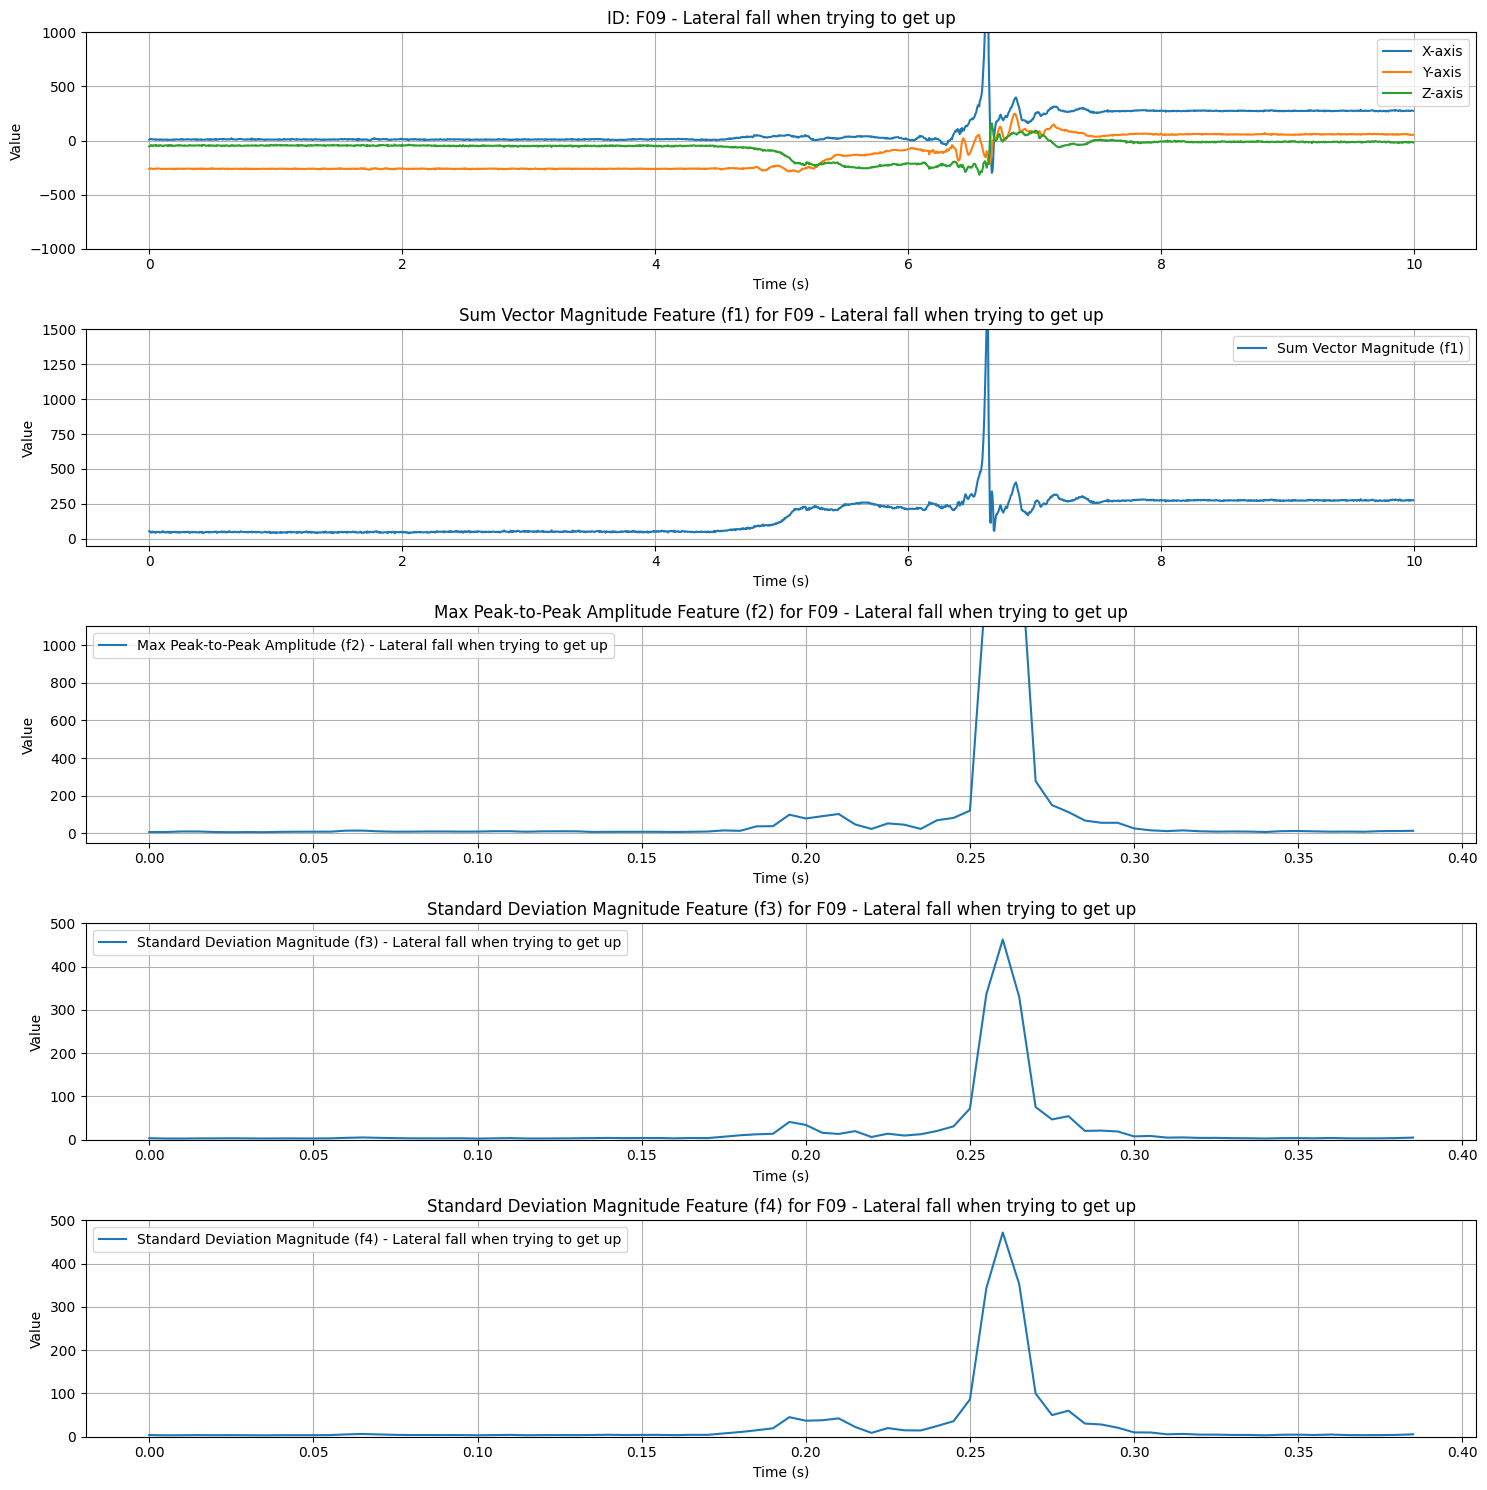

In [114]:
sample_num = 10

plt.figure(figsize=(15, 15))
time = np.arange(0, len(trimmed_data[sample_num][0, :])) / 200  # Assuming a sampling rate of 200 Hz
# Plot the Original Signal
plt.subplot(5, 1, 1)
plt.plot(time, trimmed_data[sample_num][0, :], label='X-axis')
plt.plot(time, trimmed_data[sample_num][1, :], label='Y-axis')
plt.plot(time, trimmed_data[sample_num][2, :], label='Z-axis')
plt.ylim(-1000, 1000)
plt.title(
    f"ID: {activity_code_list[sample_num]} - "
    f"{activity_mapping[activity_code_list[sample_num]]}")
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Sum Vector Magnitude (f1)
plt.subplot(5, 1, 2)
plt.plot(time[:len(f1_trimmed_data[sample_num])], f1_trimmed_data[sample_num], label='Sum Vector Magnitude (f1)')
plt.ylim(-50, 1500)
plt.title(
    f'Sum Vector Magnitude Feature (f1) for {activity_code_list[sample_num]} - '
    f'{activity_mapping[activity_code_list[sample_num]]}')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Max Peak-to-Peak Amplitude (f2)
plt.subplot(5, 1, 3)
plt.plot(time[:len(f2_trimmed_data[sample_num])], f2_trimmed_data[sample_num], label='Max Peak-to-Peak Amplitude (f2) - '
    f'{activity_mapping[activity_code_list[sample_num]]}')
plt.ylim(-50, 1100)
plt.title(f'Max Peak-to-Peak Amplitude Feature (f2) for {activity_code_list[sample_num]} - {activity_mapping[activity_code_list[sample_num]]}')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Standard Deviation Magnitude on Horizontal Plane (f3)
plt.subplot(5, 1, 4)
plt.plot(time[:len(f3_trimmed_data[sample_num])], f3_trimmed_data[sample_num], label='Standard Deviation Magnitude (f3) - '
    f'{activity_mapping[activity_code_list[sample_num]]}')
plt.ylim(0, 500)
plt.title(f'Standard Deviation Magnitude Feature (f3) for {activity_code_list[sample_num]} - {activity_mapping[activity_code_list[sample_num]]}')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Standard Deviation Magnitude (f4)
plt.subplot(5, 1, 5)
plt.plot(time[:len(f4_trimmed_data[sample_num])], f4_trimmed_data[sample_num], label='Standard Deviation Magnitude (f4) - '
    f'{activity_mapping[activity_code_list[sample_num]]}')
plt.ylim(0, 500)
plt.title(f'Standard Deviation Magnitude Feature (f4) for {activity_code_list[sample_num]} - {activity_mapping[activity_code_list[sample_num]]}')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [115]:
# plot random 20 samples
sample_numbers = np.random.randint(1, 4505, size=20)

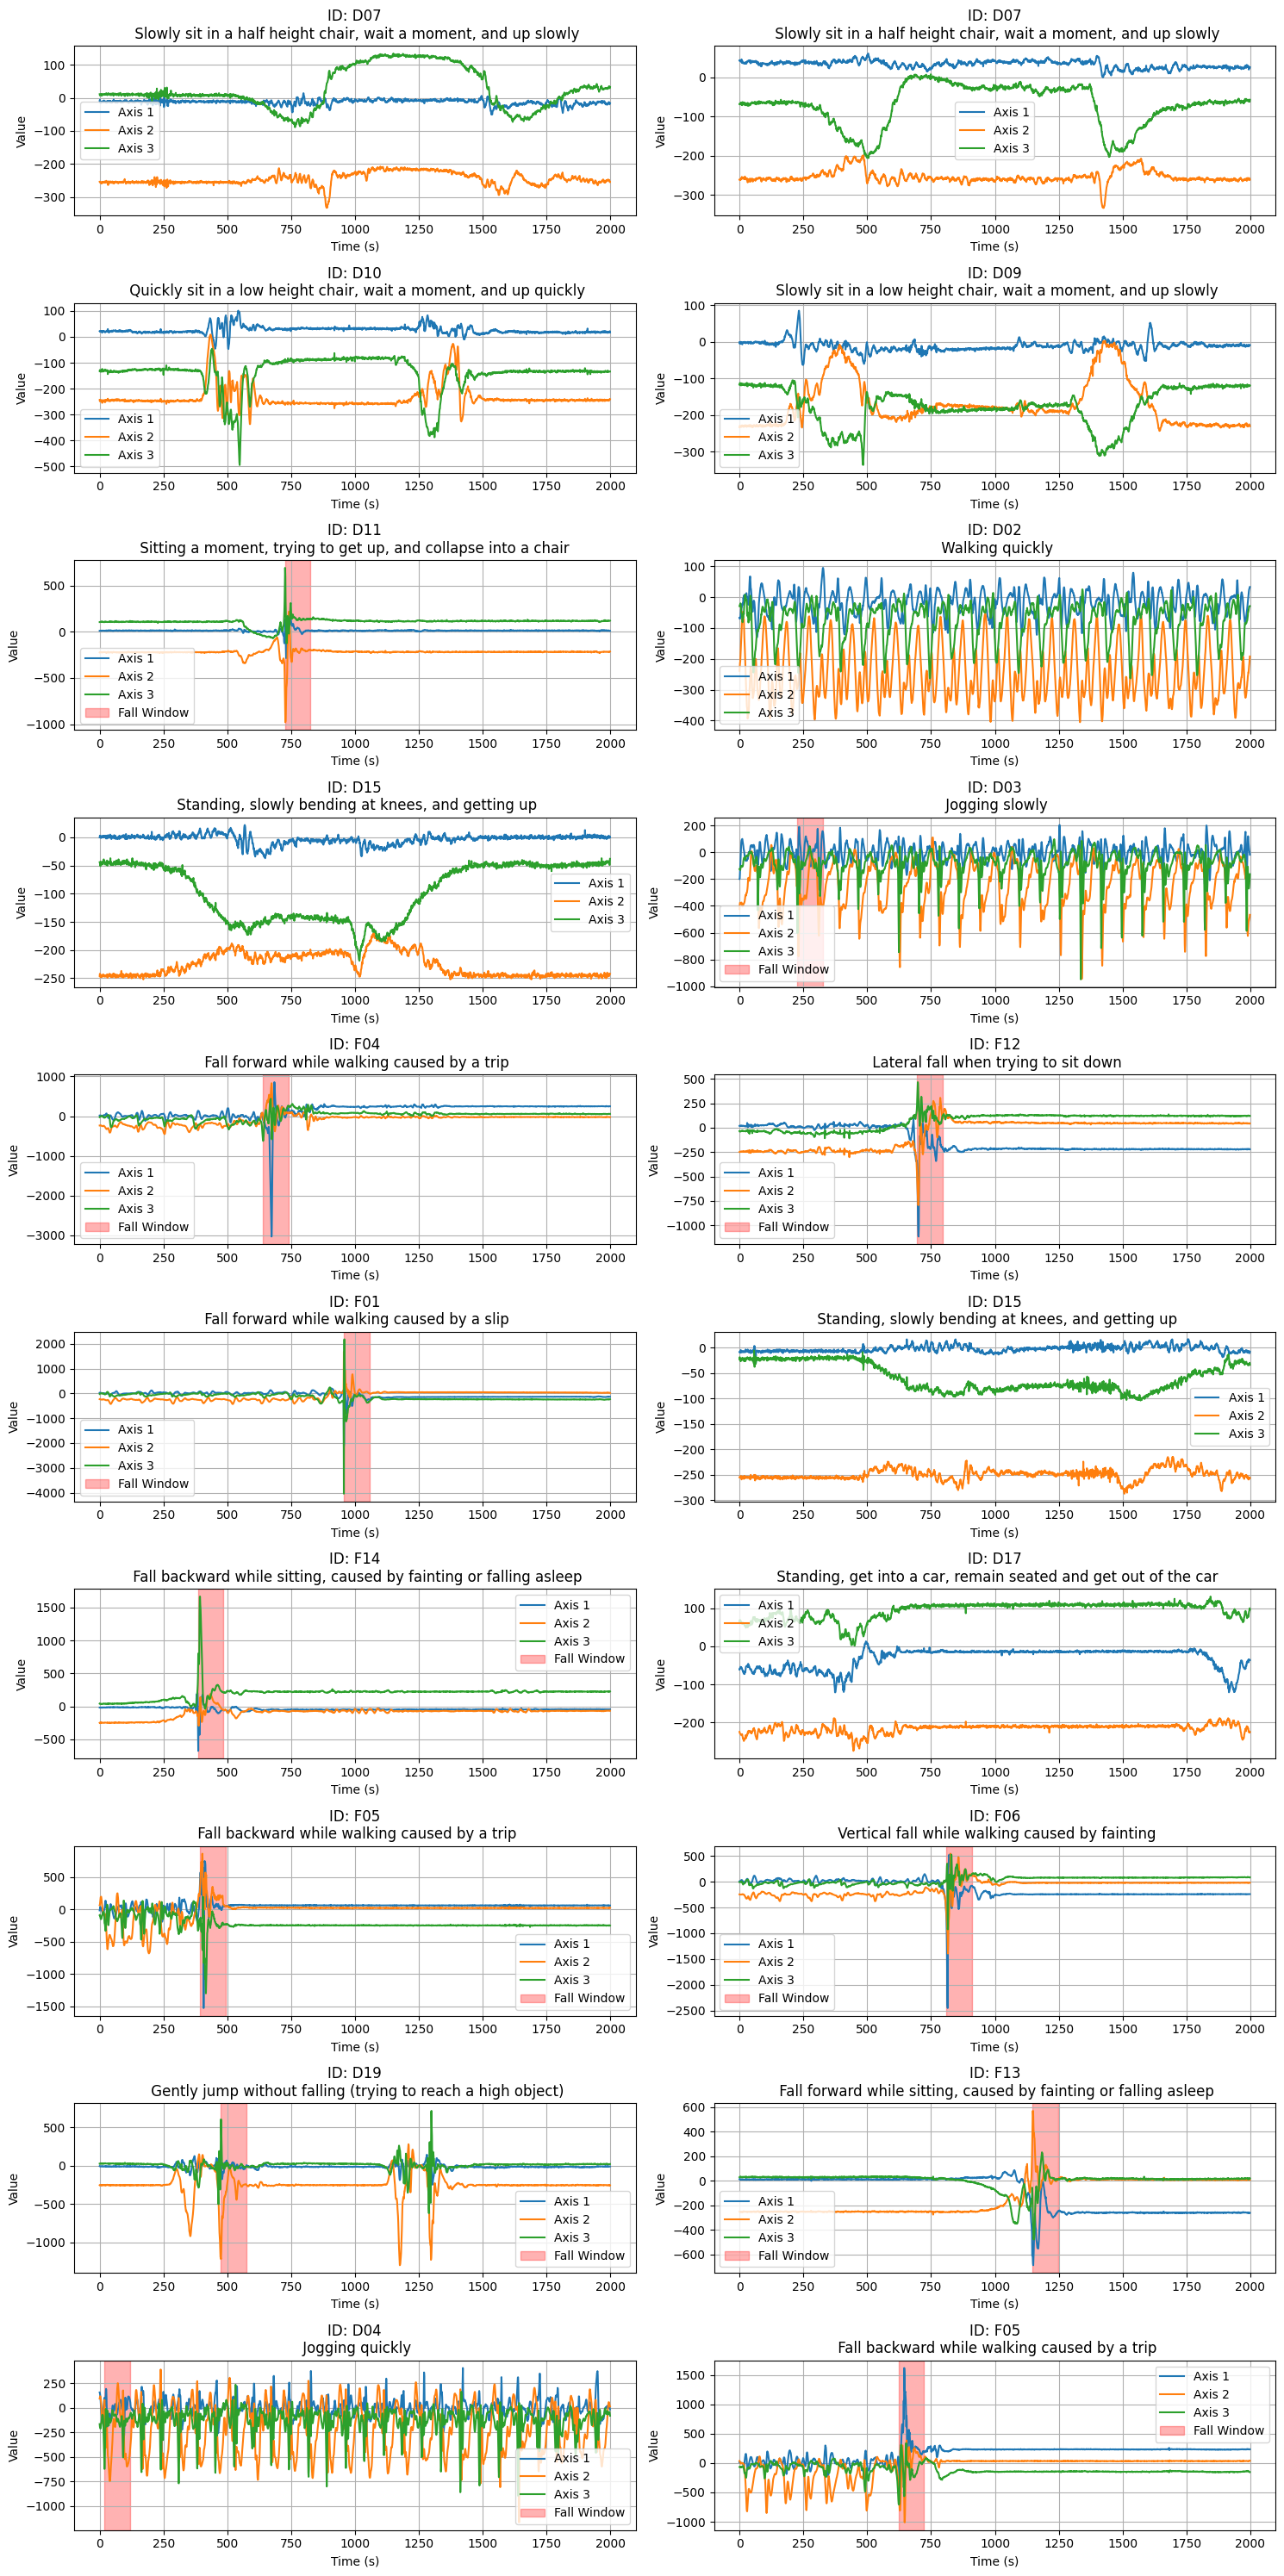

In [116]:

plt.figure(figsize=(15, 30))
for i, sample_number in enumerate(sample_numbers):
    signal = trimmed_data[sample_number][0:3,:]  # Example signal
    start, end = find_fall_window(signal, threshold=700)
    
    # plt.subplot(20, 1, i+1)
    # for j in range(3):
    #     plt.plot(signal[j,:], label=f'Axis {j+1}')
    # plt.axvspan(start, end, color='red', alpha=0.5, label='Fall Window')
    # plt.ylim(-1100, 1100)
    # plt.title(f'Original Axis Signals for {activity_code_list[sample_number]}')
    # plt.xlabel('Time (s)')
    # plt.ylabel('Value')
    # plt.legend()
    # plt.tight_layout()
    # plt.grid()


    plt.subplot(10, 2, i + 1)
    for j in range(3):
        plt.plot(signal[j, :], label=f'Axis {j+1}')
    if start is not None and end is not None:
        plt.axvspan(start, end, color='red', alpha=0.3, label='Fall Window')
    plt.title(
        f"ID: {activity_code_list[sample_number]}\n "
        f"{activity_mapping[activity_code_list[sample_number]]}")
    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
plt.tight_layout()
plt.show()

In [117]:
print(len(trimmed_data[53][0]))
print(len(all_data[53][4,:]))


1999
3000


In [118]:
# create a set for all unique activity codes
activity_types = set(activity_code_list)

# print(activity_types)
# sort the activity types
sorted_activity_types = sorted(activity_types)

print(sorted_activity_types)

# for activity in sorted_activity_types:
#     print(activity)


['D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15']


In [119]:
# create a dictionary for all unique activity codes
activity_dict = {activity: i for i, activity in enumerate(sorted_activity_types)}
for activity, code in activity_dict.items():
    print(f"{activity}: {code}")


D01: 0
D02: 1
D03: 2
D04: 3
D05: 4
D06: 5
D07: 6
D08: 7
D09: 8
D10: 9
D11: 10
D12: 11
D13: 12
D14: 13
D15: 14
D16: 15
D17: 16
D18: 17
D19: 18
F01: 19
F02: 20
F03: 21
F04: 22
F05: 23
F06: 24
F07: 25
F08: 26
F09: 27
F10: 28
F11: 29
F12: 30
F13: 31
F14: 32
F15: 33


In [120]:
# create label list of activity types
activity_codes = [activity_dict[activity] for activity in activity_code_list if activity in activity_dict]


In [121]:
# create activity code list of fall and adl
boolean_list = []
for i in range(len(activity_code_list)):
    if activity_code_list[i].startswith('D'):
        boolean_list.append(1)
    elif activity_code_list[i].startswith('F'):
        boolean_list.append(0)
    else:
        print(f"Unknown activity code: {activity_code_list[i]}")

In [122]:
boolean_list = np.array(boolean_list)
print(boolean_list.shape)
print(boolean_list)

(4505,)
[1 1 0 ... 1 1 1]


In [123]:
for activity, code in zip(activity_code_list, activity_codes):
    print(f"{activity} --> {code}")


D16 --> 15
D11 --> 10
F09 --> 27
D04 --> 3
D03 --> 2
D16 --> 15
F08 --> 26
D11 --> 10
D05 --> 4
D17 --> 16
F09 --> 27
D10 --> 9
D10 --> 9
F09 --> 27
D17 --> 16
D11 --> 10
D05 --> 4
F08 --> 26
D16 --> 15
D02 --> 1
D05 --> 4
D10 --> 9
D17 --> 16
F08 --> 26
D16 --> 15
F08 --> 26
D11 --> 10
D05 --> 4
D17 --> 16
F09 --> 27
D10 --> 9
D10 --> 9
F09 --> 27
D17 --> 16
D11 --> 10
D05 --> 4
F08 --> 26
D16 --> 15
F10 --> 28
F04 --> 22
D09 --> 8
F03 --> 21
F05 --> 23
F11 --> 29
D08 --> 7
F02 --> 20
F02 --> 20
D08 --> 7
F05 --> 23
F11 --> 29
F03 --> 21
D09 --> 8
F10 --> 28
F04 --> 22
F05 --> 23
F02 --> 20
D08 --> 7
F10 --> 28
F10 --> 28
F04 --> 22
D09 --> 8
F03 --> 21
F05 --> 23
F11 --> 29
D08 --> 7
F02 --> 20
F02 --> 20
D08 --> 7
F05 --> 23
F11 --> 29
F03 --> 21
D09 --> 8
F10 --> 28
F04 --> 22
D09 --> 8
F11 --> 29
F03 --> 21
F04 --> 22
D19 --> 18
F14 --> 32
F13 --> 31
F07 --> 25
D18 --> 17
F15 --> 33
F01 --> 19
F06 --> 24
F12 --> 30
F06 --> 24
F12 --> 30
F15 --> 33
F01 --> 19
D18 --> 17
F13 --> 31


In [124]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [125]:
# Split into Train/Test Sets for Convolutional Neural Network model

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(trimmed_data, boolean_list, test_size=0.4, random_state=42)
# Split the testing set into validation and testing sets
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)
print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Validation data shape: {x_val.shape}")

# Define the number of classes
num_classes = 2  # Binary classification: Fall (0) and ADL (1)

# Reshape data for CNN input shape
x_train = x_train.reshape(-1, 6, min_length, 1)
x_val = x_val.reshape(-1, 6, min_length, 1)
x_test = x_test.reshape(-1, 6, min_length, 1)

# Convert labels to one-hot encoding
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(6, min_length, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # For categorical classification
])

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val), verbose=1)


Training data shape: (2703, 6, 1999)
Testing data shape: (901, 6, 1999)
Validation data shape: (901, 6, 1999)


/Users/amir/Documents/projects/fall-detection/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 6, 1999, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 999, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 999, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 499, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 31936)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,087,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,107,010 (15.67 MB)

 Trainable params: 4,107,010 (15.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.8099 - loss: 107.5286 - val_accuracy: 0.9845 - val_loss: 0.1399
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.9612 - loss: 0.1148 - val_accuracy: 0.9834 - val_loss: 0.1292
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.9860 - loss: 0.0843 - val_accuracy: 0.9878 - val_loss: 0.0686
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.9900 - loss: 0.0487 - val_accuracy: 0.9856 - val_loss: 0.0677
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.9827 - loss: 0.0530 - val_accuracy: 0.9800 - val_loss: 0.0658
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.9917 - loss: 0.0407 - val_accuracy: 0.9867 - val_loss: 0.0915
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.9889 - loss: 0.0370 - val_accuracy: 0.9822 - val_loss: 0.1475
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.9921 - loss: 0.0277 - val_accuracy: 0.9800 -

In [126]:
# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9926 - loss: 0.0253
Test Loss: 0.0220
Test Accuracy: 0.9911


In [127]:
from sklearn.metrics import jaccard_score

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class indices
y_true_classes = np.argmax(y_test, axis=1)  # Convert true labels to class indices

# Calculate Jaccard score for binary classification
jaccard = jaccard_score(y_true_classes, y_pred_classes, pos_label=0)
print(f"Jaccard Score: {jaccard}")

jaccard = jaccard_score(y_true_classes, y_pred_classes, pos_label=1)
print(f"Jaccard Score: {jaccard}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Jaccard Score: 0.9786096256684492
Jaccard Score: 0.9850467289719627


In [128]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools

def plot_confusion_matrix(cm, classes, normalize = False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:   
        print('Confusion matrix, without normalization')
        print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '0.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization
[[366   2]
 [  6 527]]


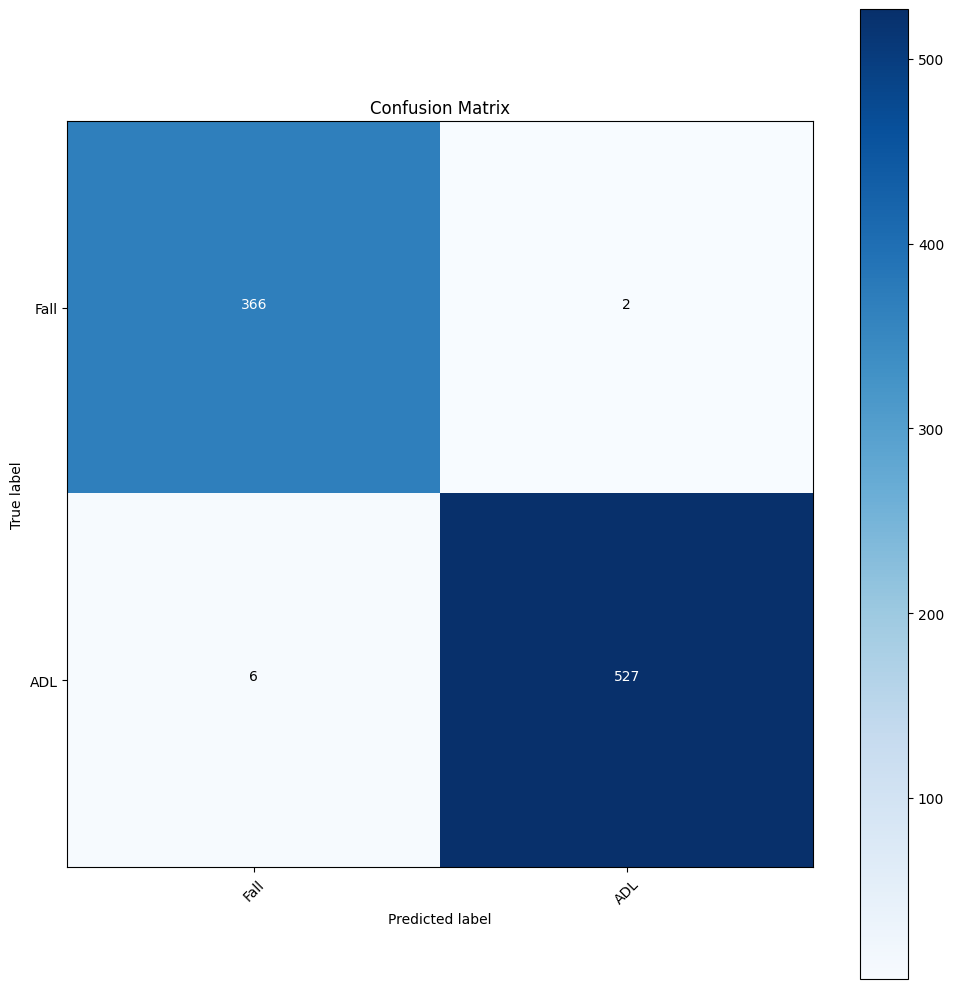

In [129]:
cnf = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf, classes=['Fall', 'ADL'], normalize=False, title='Confusion Matrix')


# tsfresh:

In [130]:
df_time = np.arange(0, len(trimmed_data[0][0, :])) / 200  # Assuming a sampling rate of 200 Hz



In [131]:
type(df_time)

numpy.ndarray

In [132]:
df_time

array([0.000e+00, 5.000e-03, 1.000e-02, ..., 9.980e+00, 9.985e+00,
       9.990e+00])

In [133]:
# create a dataframe for the time and 3-axis accelerometer data and 3-axis gyroscope data

df = pd.DataFrame({
    'ID': '1',
    'Tag': f'{activity_code_list[0]}',
    'Time': df_time,
    'Acc X': trimmed_data[0][0, :],
    'Acc Y': trimmed_data[0][1, :],
    'Acc Z': trimmed_data[0][2, :],
    'Gyro X': trimmed_data[0][3, :],
    'Gyro Y': trimmed_data[0][4, :],
    'Gyro Z': trimmed_data[0][5, :]
})


In [134]:
df

,ID,Tag,Time,Acc X,Acc Y,Acc Z,Gyro X,Gyro Y,Gyro Z
0,1,D16,0.000,-13,-262,-47,-47,0,-4
1,1,D16,0.005,-10,-261,-45,-47,1,-3
2,1,D16,0.010,-11,-260,-48,-46,0,-3
3,1,D16,0.015,-11,-259,-47,-46,2,-4
4,1,D16,0.020,-10,-261,-47,-45,3,-4
...,...,...,...,...,...,...,...,...,...
1994,1,D16,9.970,-10,-259,-45,-60,-14,2
1995,1,D16,9.975,-11,-260,-43,-60,-14,2
1996,1,D16,9.980,-10,-262,-44,-60,-14,0
1997,1,D16,9.985,-7,-263,-43,-61,-14,1


In [135]:
id_list = np.arange(1, len(trimmed_data) + 1)
id_list

array([   1,    2,    3, ..., 4503, 4504, 4505])

In [136]:
def ts_fresh_format(input_data, labels, sample_rate=200):
    """
    Converts raw 6-axis sensor data into a long DataFrame suitable for tsfresh.
    Shows progress from 0% to 100%.
    
    input_data: list or array of shape (num_samples, 6, time_steps)
    labels: list of length num_samples
    """
    all_dfs = []
    total = len(input_data)
    time = np.arange(0, len(input_data[0][0, :])) / sample_rate

    for i in range(total):
        sample = input_data[i]
        df = pd.DataFrame({
            'ID': i + 1,
            'Tag': labels[i],
            'Time': time,
            'Acc X': sample[0, :],
            'Acc Y': sample[1, :],
            'Acc Z': sample[2, :],
            'Gyro X': sample[3, :],
            'Gyro Y': sample[4, :],
            'Gyro Z': sample[5, :]
        })
        all_dfs.append(df)

        # Print progress
        if (i + 1) % (total // 100) == 0 or i == total - 1:  # Every 1%
            percent = int((i + 1) / total * 100)
            print(f"\rProgress: {percent}%", end='')

    print("\n✅ Finished creating the DataFrame.")
    df_all = pd.concat(all_dfs, ignore_index=True)
    return df_all


In [137]:
df_all = ts_fresh_format(trimmed_data, activity_code_list)
df_all

Progress: 100%
✅ Finished creating the DataFrame.


,ID,Tag,Time,Acc X,Acc Y,Acc Z,Gyro X,Gyro Y,Gyro Z
0,1,D16,0.000,-13,-262,-47,-47,0,-4
1,1,D16,0.005,-10,-261,-45,-47,1,-3
2,1,D16,0.010,-11,-260,-48,-46,0,-3
3,1,D16,0.015,-11,-259,-47,-46,2,-4
4,1,D16,0.020,-10,-261,-47,-45,3,-4
...,...,...,...,...,...,...,...,...,...
9005490,4505,D14,9.970,-1,-52,249,74,-21,10
9005491,4505,D14,9.975,1,-50,251,54,-37,11
9005492,4505,D14,9.980,0,-43,251,28,-44,2
9005493,4505,D14,9.985,1,-43,249,7,-53,-10


In [138]:
df_all.head()

,ID,Tag,Time,Acc X,Acc Y,Acc Z,Gyro X,Gyro Y,Gyro Z
0,1,D16,0.000,-13,-262,-47,-47,0,-4
1,1,D16,0.005,-10,-261,-45,-47,1,-3
2,1,D16,0.010,-11,-260,-48,-46,0,-3
3,1,D16,0.015,-11,-259,-47,-46,2,-4
4,1,D16,0.020,-10,-261,-47,-45,3,-4


In [139]:
from tsfresh import extract_features

In [140]:
df_tsfresh = pd.melt(
    df_all,
    id_vars=['ID', 'Time', 'Tag'],
    value_vars=['Acc X', 'Acc Y', 'Acc Z', 'Gyro X', 'Gyro Y', 'Gyro Z'],
    var_name='feature',
    value_name='value'
)


In [ ]:

import multiprocessing


extracted_features = extract_features(
    df_tsfresh,
    column_id='ID',
    column_sort='Time',
    column_kind='feature',
    column_value='value',
    n_jobs=2
)


12


Feature Extraction:   0%|          | 0/50 [02:08<?, ?it/s]


KeyboardInterrupt: 

In [ ]:

# Get labels (y) for classification
y = df_all[['ID', 'Tag']].drop_duplicates().set_index('ID')['Tag']


In [ ]:
# df_long = convert_to_tsfresh_format(trimmed_data)